In [1]:
import numpy as np
import pandas as pd
import statistics as st
import scipy.stats as sts
from scipy.stats import norm
from scipy.stats import t
from math import sqrt
import seaborn as sns 
import matplotlib.pyplot as plt

import pymysql as sql
from sqlalchemy import create_engine 

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.cluster import KMeans

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
apperance = pd.read_excel("appearances.xlsx")
apperance

,appearance_id,game_id,player_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2224728_119169,2224728,119169,2012-07-13,Aron Johannsson,DK1,0,0,0,0,90
1,2224732_161244,2224732,161244,2012-07-14,Conor O'Brien,DK1,0,0,1,0,90
2,2224729_39467,2224729,39467,2012-07-15,Clarence Goodson,DK1,0,0,0,0,90
3,2232104_119169,2232104,119169,2012-07-19,Aron Johannsson,ELQ,0,0,0,0,74
4,2219794_39475,2219794,39475,2012-07-22,Sacha Kljestan,BESC,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
3563,3415291_537467,3415291,537467,2020-09-26,Joseph Efford,BE1,0,0,1,0,77
3564,3415296_367423,3415296,367423,2020-09-26,Chris Durkin,BE1,1,0,0,0,84
3565,3431983_478940,3431983,478940,2020-09-26,Reggie Cannon,PO1,0,0,0,0,90
3566,3450575_361104,3450575,361104,2020-09-26,Sergino Dest,NL1,0,0,0,0,6


In [3]:
apperance.columns

Index(['appearance_id', 'game_id', 'player_id', 'date', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played'],
      dtype='object')

In [4]:
apperance['yellow_cards'].unique()

array([0, 1, 2], dtype=int64)

In [5]:
games = pd.read_excel("games.xlsx")
games

,game_id,competition_id,season,round,date,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2222734,RU1,2012,19. Matchday,2012-12-07,2,3,11.0,10.0,Miodrag Bozovic,Slavoljub Muslin,Olimp-2,5700.0,Sergey Kuznetsov,NaN,NaN,FK Rostov,FK Krasnodar,02:03:00,domestic_league
1,2224572,DK1,2012,3. Matchday,2012-07-28,1,2,12.0,1.0,Jess Thorup,Lars Sondergaard,Blue Water Arena,5345.0,Michael Svendsen,NaN,NaN,Esbjerg fB,Sonderjyske Fc,01:02:00,domestic_league
2,2224628,DK1,2012,22. Matchday,2013-03-08,2,0,3.0,10.0,Colin Todd,Lars Sondergaard,Cepheus Park Randers,3481.0,Jakob Kehlet,NaN,NaN,Randers Fodbold Club,Sonderjyske Fc,02:00:00,domestic_league
3,2224655,DK1,2012,22. Matchday,2013-03-10,0,3,6.0,12.0,Peter Rensen,Auri Skarbalius,Ceres Park,7967.0,Kenn Hansen,NaN,NaN,Aarhus Gymnastik Forening,BRA NDBYERNES,00:03:00,domestic_league
4,2224729,DK1,2012,1. Matchday,2012-07-15,0,1,9.0,5.0,Auri Skarbalius,Troels Bech,Brondby Stadium,10806.0,Lars Christoffersen,NaN,NaN,Brondby IF,Odense Boldklub,00:01:00,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3263,3296153,NLP,2019,Round of 16,2020-01-22,7,0,NaN,NaN,Erik ten Hag,Eric Meijers,Johan Cruijff ArenA,52017.0,Richard Martens,NaN,NaN,AFC Ajax Amsterdam,NaN,07:00:00,domestic_cup
3264,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,Thomas Thomasberg,Right to Dream Park,2843.0,Michael Tykgaard,NaN,NaN,Football Club Nords,Hobro IK,03:02:00,domestic_league
3265,3099247,BE1,2018,11. Matchday,2018-10-20,3,1,9.0,7.0,Glen De Boeck,Marc Brys,Guldensporenstadion,6143.0,Wesley Alen,NaN,NaN,Koninklijke Voetbalclub Kortrijk,Koninklijke Sint-Truidense Voetbalvereniging,03:01:00,domestic_league
3266,2872273,GB1,2017,16. Matchday,2017-12-09,5,1,6.0,15.0,Mauricio Pochettino,Mark Hughes,Wembley Stadium,62202.0,Roger East,NaN,NaN,Tottenham Hotspur Football Club,Stoke City,05:01:00,domestic_league


In [6]:
games.columns

Index(['game_id', 'competition_id', 'season', 'round', 'date',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type'],
      dtype='object')

In [7]:
game_event = pd.read_excel("game_events.xlsx")
game_event

,game_event_id,date,game_id,minute,type,player_id,description,player_in_id,player_assist_id
0,c6a3c088ed8a38d4ce074dd73b20d3da,2012-08-19,2221641,62,Substitutions,1335,", Not reported",45668.0,NaN
1,02d605a5c2dc4f9a6721daa583fa5405,2012-08-26,2222536,54,Cards,1321,"1. Yellow card , Foul",NaN,NaN
2,b56c2e2e087cddb3cfe9e3d340975df9,2012-11-18,2222707,79,Substitutions,104203,", Tactical",25740.0,NaN
3,4a15d1fff4f476f48bb60092c61641d5,2012-11-23,2222721,72,Substitutions,104203,", Tactical",15583.0,NaN
4,daa97877f7edf2fda885b411d7197921,2013-05-17,2222782,63,Goals,104203,", Right-footed shot, 1. Goal of the Season Ass...",NaN,15077.0
...,...,...,...,...,...,...,...,...,...
1844,4acebccbc824e45d51045d8c5e164341,2023-10-31,4194147,3,Goals,355369,", Left-footed shot, 1. Tournament Goal Assist:...",NaN,284010.0
1845,159ad5633cf9d7c3a97b593efb6c3269,2023-10-31,4194147,9,Goals,355369,", Right-footed shot, 2. Tournament Goal Assist...",NaN,629588.0
1846,daa31f19aab26eec375884aef73c73b3,2023-10-31,4194147,65,Substitutions,355369,", Tactical",544148.0,NaN
1847,869a13060604e769290dafe0b1f14483,2023-11-01,4194152,70,Substitutions,504215,", Tactical",406640.0,NaN


In [8]:
game_event.columns

Index(['game_event_id', 'date', 'game_id', 'minute', 'type', 'player_id',
       'description', 'player_in_id', 'player_assist_id'],
      dtype='object')

In [9]:
game_event['type'].unique()

array(['Substitutions', 'Cards', 'Goals'], dtype=object)

In [10]:
game_lineup = pd.read_excel("game_lineups.xlsx")
game_lineup

,game_lineups_id,game_id,type,number,player_id,player_name,team_captain,position
0,f2570d1504fc02f4b6c7608e8dcf89a3,4087925,substitutes,34,242284,Ethan Horvath,0,Goalkeeper
1,f5f0da93ea8e1d8bdd799658e7c8f7cb,4087928,starting_lineup,13,145466,Tim Ream,0,Centre-Back
2,31a4d12ec23d604779d909d26c1b5410,4087929,substitutes,26,578539,Chris Richards,0,Centre-Back
3,776dcbef98651450db76723cb7e3b4df,4087935,substitutes,26,578539,Chris Richards,0,Centre-Back
4,6a35ef7495303f29e7f85dbd54547fb1,4087936,starting_lineup,13,145466,Tim Ream,1,Centre-Back
...,...,...,...,...,...,...,...,...
214,ec3d266094f99ca0a8847de827e37105,4194152,starting_lineup,7,504215,Giovanni Reyna,0,Right Winger
215,667840cda9bdf3b0344b8e99b306cf38,4194152,starting_lineup,23,124732,John Anthony Brooks,0,Centre-Back
216,1c5d2f60ee777760f8a757aa10c42bb1,4194154,starting_lineup,13,103064,Terrence Boyd,0,Centre-Forward
217,99032084fd00ffbfee52c541a9f960ab,4204000,substitutes,14,315762,Luca de la Torre,0,Central Midfield


In [11]:
game_lineup.columns

Index(['game_lineups_id', 'game_id', 'type', 'number', 'player_id',
       'player_name', 'team_captain', 'position'],
      dtype='object')

In [12]:
game_lineup['type'].unique()

array(['substitutes', 'starting_lineup'], dtype=object)

In [13]:
players = pd.read_excel("players.xlsx")
players

,player_id,name,last_season,current_club_id,player_code,country_of_birth,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,124732,John Anthony Brooks,2023,533,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30,ROGON
1,223047,Emerson Hyndman,2018,903,emerson-hyndman,United States,1996-04-09,Central Midfield,Midfield,right,170.0,800000.0,1800000.0,NaT,OmniSports
2,307781,Lynden Gooch,2016,289,lynden-gooch,United States,1995-12-24,Right Winger,Attack,right,173.0,1000000.0,1000000.0,2024-06-30,Unique Sports Group
3,370846,Timothy Weah,2023,506,timothy-weah,United States,2000-02-22,Right Midfield,Midfield,right,183.0,14000000.0,15000000.0,2028-06-30,BS Group - BS Law
4,484756,Djordje Mihailovic,2023,1090,djordje-mihailovic,United States,1998-11-10,Attacking Midfield,Midfield,NaN,178.0,5000000.0,6000000.0,2026-06-30,YMU Management Ltd.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,273570,Desevio Payne,2020,1283,desevio-payne,United States,1995-11-30,Right-Back,Defender,right,182.0,NaN,400000.0,NaT,NaN
148,111783,Alejandro Bedoya,2015,995,alejandro-bedoya,United States,1987-04-29,Central Midfield,Midfield,right,182.0,300000.0,2500000.0,2023-12-31,YMU Group
149,160670,Joe Gyau,2014,16,joe-gyau,United States,1992-09-16,Left Winger,Attack,both,175.0,400000.0,600000.0,2023-12-31,BR Group Management
150,3476,Brad Friedel,2014,148,brad-friedel,United States,1971-05-18,Goalkeeper,Goalkeeper,NaN,NaN,NaN,4000000.0,NaT,NaN


In [14]:
players.columns

Index(['player_id', 'name', 'last_season', 'current_club_id', 'player_code',
       'country_of_birth', 'date_of_birth', 'sub_position', 'position', 'foot',
       'height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date', 'agent_name'],
      dtype='object')

In [15]:
test_data = pd.read_excel("test data.xlsx")


### Data Merging

In [16]:
performance_analysis_df = pd.merge(apperance,games, on='game_id', how='inner')
performance_analysis_df

,appearance_id,game_id,player_id,date_x,player_name,competition_id_x,yellow_cards,red_cards,goals,assists,...,away_club_manager_name,stadium,attendance,referee,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2224728_119169,2224728,119169,2012-07-13,Aron Johannsson,DK1,0,0,0,0,...,Kent Nielsen,Ceres Park,9728.0,Michael Svendsen,NaN,NaN,Aarhus Gymnastik Forening,Aalborg BK,01:01:00,domestic_league
1,2224732_161244,2224732,161244,2012-07-14,Conor O'Brien,DK1,0,0,1,0,...,Colin Todd,Sydbank Park,2995.0,Claus Bo Larsen,NaN,NaN,Sonderjyske Fc,Randers Fodbold Club,06:01:00,domestic_league
2,2224729_39467,2224729,39467,2012-07-15,Clarence Goodson,DK1,0,0,0,0,...,Troels Bech,Brondby Stadium,10806.0,Lars Christoffersen,NaN,NaN,Brondby IF,Odense Boldklub,00:01:00,domestic_league
3,2232104_119169,2232104,119169,2012-07-19,Aron Johannsson,ELQ,0,0,0,0,...,Temur Shalamberidze,Ceres Park,9000.0,Boako Jovanetic,NaN,NaN,Aarhus Gymnastik Forening,NaN,01:02:00,international_cup
4,2219794_39475,2219794,39475,2012-07-22,Sacha Kljestan,BESC,0,0,0,0,...,Peter Maes,Constant Vanden Stock Stadion,14485.0,Laurent Colemonts,NaN,NaN,Royal Sporting Club Anderlecht,KSC Lokeren (- 2020),03:02:00,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3563,3415291_537467,3415291,537467,2020-09-26,Joseph Efford,BE1,0,0,1,0,...,Nicky Hayen,Olympisch Stadion,3200.0,Wesli De Cremer,NaN,NaN,Beerschot V.A.,SK Beveren,03:02:00,domestic_league
3564,3415296_367423,3415296,367423,2020-09-26,Chris Durkin,BE1,1,0,0,0,...,Kevin Muscat,AFAS Stadion,5185.0,Nathan Verboomen,NaN,NaN,Yellow-Red Koninklijke Voetbalclub Mechelen,Koninklijke Sint-Truidense Voetbalvereniging,02:00:00,domestic_league
3565,3431983_478940,3431983,478940,2020-09-26,Reggie Cannon,PO1,0,0,0,0,...,Sergio Conceicao,Estádio do Bessa,NaN,Luís Godinho,NaN,NaN,Boavista Futebol Clube,Futebol Clube do Porto,00:05:00,domestic_league
3566,3450575_361104,3450575,361104,2020-09-26,Sergino Dest,NL1,0,0,0,0,...,Thomas Letsch,Johan Cruijff ArenA,15000.0,Pol van Boekel,NaN,NaN,AFC Ajax Amsterdam,Stichting Betaald Voetbal Vitesse Arnhem,02:01:00,domestic_league


In [17]:
performance_analysis_df.columns

Index(['appearance_id', 'game_id', 'player_id', 'date_x', 'player_name',
       'competition_id_x', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'competition_id_y', 'season', 'round', 'date_y',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type'],
      dtype='object')

In [18]:
performance_analysis_df['yellow_cards'].unique()

array([0, 1, 2], dtype=int64)

In [19]:
performance_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3568 entries, 0 to 3567
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   appearance_id           3568 non-null   object        
 1   game_id                 3568 non-null   int64         
 2   player_id               3568 non-null   int64         
 3   date_x                  3568 non-null   datetime64[ns]
 4   player_name             3568 non-null   object        
 5   competition_id_x        3568 non-null   object        
 6   yellow_cards            3568 non-null   int64         
 7   red_cards               3568 non-null   int64         
 8   goals                   3568 non-null   int64         
 9   assists                 3568 non-null   int64         
 10  minutes_played          3568 non-null   int64         
 11  competition_id_y        3568 non-null   object        
 12  season                  3568 non-null   int64   

In [20]:
performance_analysis_df.isnull().sum()

appearance_id                0
game_id                      0
player_id                    0
date_x                       0
player_name                  0
competition_id_x             0
yellow_cards                 0
red_cards                    0
goals                        0
assists                      0
minutes_played               0
competition_id_y             0
season                       0
round                        0
date_y                       0
home_club_goals              0
away_club_goals              0
home_club_position         503
away_club_position         503
home_club_manager_name       5
away_club_manager_name       5
stadium                      0
attendance                 133
referee                      3
home_club_formation       3568
away_club_formation       3568
home_club_name             113
away_club_name              65
aggregate                    0
competition_type             0
dtype: int64

In [21]:
performance_analysis_df = performance_analysis_df.drop(['date_y','competition_id_y'],axis=1)

In [22]:
performance_analysis_df = performance_analysis_df.rename(columns={'date_x':'date','competition_id_x':'competition_id'})

In [23]:
performance_analysis_df=performance_analysis_df.drop(['home_club_formation','away_club_formation'],axis=1)

In [24]:
performance_analysis_df.columns

Index(['appearance_id', 'game_id', 'player_id', 'date', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type'],
      dtype='object')

In [25]:
merge1 = pd.merge(performance_analysis_df,game_event,on=['game_id','player_id'],how='inner')
merge1.columns

Index(['appearance_id', 'game_id', 'player_id', 'date_x', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'game_event_id', 'date_y', 'minute',
       'type', 'description', 'player_in_id', 'player_assist_id'],
      dtype='object')

In [26]:
merge1

,appearance_id,game_id,player_id,date_x,player_name,competition_id,yellow_cards,red_cards,goals,assists,...,away_club_name,aggregate,competition_type,game_event_id,date_y,minute,type,description,player_in_id,player_assist_id
0,2224732_161244,2224732,161244,2012-07-14,Conor O'Brien,DK1,0,0,1,0,...,Randers Fodbold Club,06:01:00,domestic_league,d9f02a9d767f319e58909ba1e1de6d23,2012-07-14,50,Goals,", Long distance kick, 1. Goal of the Season As...",NaN,NaN
1,2232104_119169,2232104,119169,2012-07-19,Aron Johannsson,ELQ,0,0,0,0,...,NaN,01:02:00,international_cup,2ab0ea7af8313c0da07c723728bb6a49,2012-07-19,74,Substitutions,", Not reported",174001.0,NaN
2,2224560_39467,2224560,39467,2012-07-22,Clarence Goodson,DK1,1,0,0,0,...,BRA NDBYERNES,02:01:00,domestic_league,e7631c64f9a922d4370ba6db39ccbfac,2012-07-22,60,Cards,"1. Yellow card , Foul",NaN,NaN
3,2224569_161244,2224569,161244,2012-07-22,Conor O'Brien,DK1,1,0,0,1,...,Football Club Ka Benhavn,01:01:00,domestic_league,abe3da42c64790a4c4ae00ff82c3024f,2012-07-22,68,Cards,"1. Yellow card , Foul",NaN,NaN
4,2224568_119169,2224568,119169,2012-07-23,Aron Johannsson,DK1,0,0,0,0,...,Esbjerg fB,00:00:00,domestic_league,1b4e309dd87c3a8f86e0675b9b29d36c,2012-07-23,73,Substitutions,", Tactical",24282.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,3450613_315762,3450613,315762,2020-09-20,Luca de la Torre,NL1,0,0,0,0,...,Heracles Almelo,04:00:00,domestic_league,027c17a496d567bce24280628ee1bce2,2020-09-20,58,Substitutions,NaN,446247.0,NaN
1118,3412906_393325,3412906,393325,2020-09-26,Josh Sargent,L1,0,0,0,1,...,Sportverein Werder Bremen von 1899,01:03:00,domestic_league,e22f77951e979538ff2e0c1fa1fd0611,2020-09-26,87,Substitutions,NaN,344830.0,NaN
1119,3415291_537467,3415291,537467,2020-09-26,Joseph Efford,BE1,0,0,1,0,...,SK Beveren,03:02:00,domestic_league,3e0892bd11f50a5259b22e5c43755ada,2020-09-26,11,Goals,", Right-footed shot, 2. Goal of the Season",NaN,NaN
1120,3415291_537467,3415291,537467,2020-09-26,Joseph Efford,BE1,0,0,1,0,...,SK Beveren,03:02:00,domestic_league,2c1bc4101fb8b426e84b9b5d55eb5783,2020-09-26,77,Substitutions,NaN,358907.0,NaN


In [27]:
merge1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   appearance_id           1122 non-null   object        
 1   game_id                 1122 non-null   int64         
 2   player_id               1122 non-null   int64         
 3   date_x                  1122 non-null   datetime64[ns]
 4   player_name             1122 non-null   object        
 5   competition_id          1122 non-null   object        
 6   yellow_cards            1122 non-null   int64         
 7   red_cards               1122 non-null   int64         
 8   goals                   1122 non-null   int64         
 9   assists                 1122 non-null   int64         
 10  minutes_played          1122 non-null   int64         
 11  season                  1122 non-null   int64         
 12  round                   1122 non-null   object  

In [28]:
merge2 = pd.merge(merge1,game_lineup,on=['player_id'],how='left')
merge2.columns

Index(['appearance_id', 'game_id_x', 'player_id', 'date_x', 'player_name_x',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'game_event_id', 'date_y', 'minute',
       'type_x', 'description', 'player_in_id', 'player_assist_id',
       'game_lineups_id', 'game_id_y', 'type_y', 'number', 'player_name_y',
       'team_captain', 'position'],
      dtype='object')

In [29]:
merge2

,appearance_id,game_id_x,player_id,date_x,player_name_x,competition_id,yellow_cards,red_cards,goals,assists,...,description,player_in_id,player_assist_id,game_lineups_id,game_id_y,type_y,number,player_name_y,team_captain,position
0,2224732_161244,2224732,161244,2012-07-14,Conor O'Brien,DK1,0,0,1,0,...,", Long distance kick, 1. Goal of the Season As...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2232104_119169,2232104,119169,2012-07-19,Aron Johannsson,ELQ,0,0,0,0,...,", Not reported",174001.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2224560_39467,2224560,39467,2012-07-22,Clarence Goodson,DK1,1,0,0,0,...,"1. Yellow card , Foul",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2224569_161244,2224569,161244,2012-07-22,Conor O'Brien,DK1,1,0,0,1,...,"1. Yellow card , Foul",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2224568_119169,2224568,119169,2012-07-23,Aron Johannsson,DK1,0,0,0,0,...,", Tactical",24282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4355,3415291_537467,3415291,537467,2020-09-26,Joseph Efford,BE1,0,0,1,0,...,NaN,358907.0,NaN,eadce2f0ce9f400d0561a8c05453d702,4150507.0,substitutes,28.0,Joseph Efford,0.0,Centre-Forward
4356,3415291_537467,3415291,537467,2020-09-26,Joseph Efford,BE1,0,0,1,0,...,NaN,358907.0,NaN,bc79183aa9a1ffacb14cc733f6143411,4150562.0,substitutes,28.0,Joseph Efford,0.0,Centre-Forward
4357,3415291_537467,3415291,537467,2020-09-26,Joseph Efford,BE1,0,0,1,0,...,NaN,358907.0,NaN,e16817800f83daf7bad1ddabf58316b7,4150625.0,substitutes,28.0,Joseph Efford,0.0,Centre-Forward
4358,3415291_537467,3415291,537467,2020-09-26,Joseph Efford,BE1,0,0,1,0,...,NaN,358907.0,NaN,0d88348def07721797108005edf3c5b4,4150656.0,substitutes,28.0,Joseph Efford,0.0,Centre-Forward


In [30]:
merge2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4360 entries, 0 to 4359
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   appearance_id           4360 non-null   object        
 1   game_id_x               4360 non-null   int64         
 2   player_id               4360 non-null   int64         
 3   date_x                  4360 non-null   datetime64[ns]
 4   player_name_x           4360 non-null   object        
 5   competition_id          4360 non-null   object        
 6   yellow_cards            4360 non-null   int64         
 7   red_cards               4360 non-null   int64         
 8   goals                   4360 non-null   int64         
 9   assists                 4360 non-null   int64         
 10  minutes_played          4360 non-null   int64         
 11  season                  4360 non-null   int64         
 12  round                   4360 non-null   object  

In [31]:
merged_df = pd.merge(merge2,players,on=['player_id'],how='inner')
merged_df

,appearance_id,game_id_x,player_id,date_x,player_name_x,competition_id,yellow_cards,red_cards,goals,assists,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2224732_161244,2224732,161244,2012-07-14,Conor O'Brien,DK1,0,0,1,0,...,United States,1988-10-20,Defensive Midfield,Midfield,right,177.0,NaN,750000.0,NaT,NaN
1,2224569_161244,2224569,161244,2012-07-22,Conor O'Brien,DK1,1,0,0,1,...,United States,1988-10-20,Defensive Midfield,Midfield,right,177.0,NaN,750000.0,NaT,NaN
2,2224575_161244,2224575,161244,2012-08-06,Conor O'Brien,DK1,0,0,0,0,...,United States,1988-10-20,Defensive Midfield,Midfield,right,177.0,NaN,750000.0,NaT,NaN
3,2224579_161244,2224579,161244,2012-08-12,Conor O'Brien,DK1,1,0,0,0,...,United States,1988-10-20,Defensive Midfield,Midfield,right,177.0,NaN,750000.0,NaT,NaN
4,2224540_161244,2224540,161244,2012-08-20,Conor O'Brien,DK1,0,0,1,0,...,United States,1988-10-20,Defensive Midfield,Midfield,right,177.0,NaN,750000.0,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4355,3450613_315762,3450613,315762,2020-09-20,Luca de la Torre,NL1,0,0,0,0,...,United States,1998-05-23,Central Midfield,Midfield,right,177.0,3000000.0,3000000.0,2026-06-30,Field Management
4356,3450613_315762,3450613,315762,2020-09-20,Luca de la Torre,NL1,0,0,0,0,...,United States,1998-05-23,Central Midfield,Midfield,right,177.0,3000000.0,3000000.0,2026-06-30,Field Management
4357,3450613_315762,3450613,315762,2020-09-20,Luca de la Torre,NL1,0,0,0,0,...,United States,1998-05-23,Central Midfield,Midfield,right,177.0,3000000.0,3000000.0,2026-06-30,Field Management
4358,3450613_315762,3450613,315762,2020-09-20,Luca de la Torre,NL1,0,0,0,0,...,United States,1998-05-23,Central Midfield,Midfield,right,177.0,3000000.0,3000000.0,2026-06-30,Field Management


In [32]:
merged_df.columns

Index(['appearance_id', 'game_id_x', 'player_id', 'date_x', 'player_name_x',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'game_event_id', 'date_y', 'minute',
       'type_x', 'description', 'player_in_id', 'player_assist_id',
       'game_lineups_id', 'game_id_y', 'type_y', 'number', 'player_name_y',
       'team_captain', 'position_x', 'name', 'last_season', 'current_club_id',
       'player_code', 'country_of_birth', 'date_of_birth', 'sub_position',
       'position_y', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date',
       'agent_name'],
      dtype='object')

In [33]:
merged_df['yellow_cards'].unique()

array([0, 1, 2], dtype=int64)

In [34]:
merged_df = merged_df.drop(['date_y','game_id_y','player_name_y','position_y'],axis=1)

In [35]:
merged_df = merged_df.rename(columns={'game_id_x':'game_id','date_x':'date','player_name_x':'player_name','position_x':'position'})

In [36]:
merged_df.isnull().sum()

appearance_id                     0
game_id                           0
player_id                         0
date                              0
player_name                       0
competition_id                    0
yellow_cards                      0
red_cards                         0
goals                             0
assists                           0
minutes_played                    0
season                            0
round                             0
home_club_goals                   0
away_club_goals                   0
home_club_position              804
away_club_position              804
home_club_manager_name            4
away_club_manager_name            4
stadium                           0
attendance                      333
referee                          22
home_club_name                  232
away_club_name                   35
aggregate                         0
competition_type                  0
game_event_id                     0
minute                      

In [37]:
num_col = merged_df.select_dtypes(exclude = 'object')

In [38]:
for i in num_col.columns:
    merged_df[i] = merged_df[i].fillna(merged_df[i].mean())
    

In [39]:
cat_col = merged_df.select_dtypes(include = 'object')

In [40]:
for c in cat_col.columns:
    merged_df[c] = merged_df[c].fillna(merged_df[c].mode()[0])

In [41]:
merged_df

,appearance_id,game_id,player_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,...,player_code,country_of_birth,date_of_birth,sub_position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2224732_161244,2224732,161244,2012-07-14,Conor O'Brien,DK1,0,0,1,0,...,conor-obrien,United States,1988-10-20,Defensive Midfield,right,177.0,1.058815e+07,750000.0,2025-12-29 10:03:04.241196032,Wasserman
1,2224569_161244,2224569,161244,2012-07-22,Conor O'Brien,DK1,1,0,0,1,...,conor-obrien,United States,1988-10-20,Defensive Midfield,right,177.0,1.058815e+07,750000.0,2025-12-29 10:03:04.241196032,Wasserman
2,2224575_161244,2224575,161244,2012-08-06,Conor O'Brien,DK1,0,0,0,0,...,conor-obrien,United States,1988-10-20,Defensive Midfield,right,177.0,1.058815e+07,750000.0,2025-12-29 10:03:04.241196032,Wasserman
3,2224579_161244,2224579,161244,2012-08-12,Conor O'Brien,DK1,1,0,0,0,...,conor-obrien,United States,1988-10-20,Defensive Midfield,right,177.0,1.058815e+07,750000.0,2025-12-29 10:03:04.241196032,Wasserman
4,2224540_161244,2224540,161244,2012-08-20,Conor O'Brien,DK1,0,0,1,0,...,conor-obrien,United States,1988-10-20,Defensive Midfield,right,177.0,1.058815e+07,750000.0,2025-12-29 10:03:04.241196032,Wasserman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4355,3450613_315762,3450613,315762,2020-09-20,Luca de la Torre,NL1,0,0,0,0,...,luca-de-la-torre,United States,1998-05-23,Central Midfield,right,177.0,3.000000e+06,3000000.0,2026-06-30 00:00:00.000000000,Field Management
4356,3450613_315762,3450613,315762,2020-09-20,Luca de la Torre,NL1,0,0,0,0,...,luca-de-la-torre,United States,1998-05-23,Central Midfield,right,177.0,3.000000e+06,3000000.0,2026-06-30 00:00:00.000000000,Field Management
4357,3450613_315762,3450613,315762,2020-09-20,Luca de la Torre,NL1,0,0,0,0,...,luca-de-la-torre,United States,1998-05-23,Central Midfield,right,177.0,3.000000e+06,3000000.0,2026-06-30 00:00:00.000000000,Field Management
4358,3450613_315762,3450613,315762,2020-09-20,Luca de la Torre,NL1,0,0,0,0,...,luca-de-la-torre,United States,1998-05-23,Central Midfield,right,177.0,3.000000e+06,3000000.0,2026-06-30 00:00:00.000000000,Field Management


merged_df.to_csv("Football_data_merged_cleaned.csv",index=False)

In [42]:
merged_df.to_excel("Football_data.xlsx",index=False)

In [43]:
Football_df = pd.read_excel("Football_data.xlsx")
Football_df

,appearance_id,game_id,player_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,...,player_code,country_of_birth,date_of_birth,sub_position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2224732_161244,2224732,161244,2012-07-14,Conor O'Brien,DK1,0,0,1,0,...,conor-obrien,United States,1988-10-20,Defensive Midfield,right,177.0,1.058815e+07,750000,2025-12-29 10:03:04.241,Wasserman
1,2224569_161244,2224569,161244,2012-07-22,Conor O'Brien,DK1,1,0,0,1,...,conor-obrien,United States,1988-10-20,Defensive Midfield,right,177.0,1.058815e+07,750000,2025-12-29 10:03:04.241,Wasserman
2,2224575_161244,2224575,161244,2012-08-06,Conor O'Brien,DK1,0,0,0,0,...,conor-obrien,United States,1988-10-20,Defensive Midfield,right,177.0,1.058815e+07,750000,2025-12-29 10:03:04.241,Wasserman
3,2224579_161244,2224579,161244,2012-08-12,Conor O'Brien,DK1,1,0,0,0,...,conor-obrien,United States,1988-10-20,Defensive Midfield,right,177.0,1.058815e+07,750000,2025-12-29 10:03:04.241,Wasserman
4,2224540_161244,2224540,161244,2012-08-20,Conor O'Brien,DK1,0,0,1,0,...,conor-obrien,United States,1988-10-20,Defensive Midfield,right,177.0,1.058815e+07,750000,2025-12-29 10:03:04.241,Wasserman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4355,3450613_315762,3450613,315762,2020-09-20,Luca de la Torre,NL1,0,0,0,0,...,luca-de-la-torre,United States,1998-05-23,Central Midfield,right,177.0,3.000000e+06,3000000,2026-06-30 00:00:00.000,Field Management
4356,3450613_315762,3450613,315762,2020-09-20,Luca de la Torre,NL1,0,0,0,0,...,luca-de-la-torre,United States,1998-05-23,Central Midfield,right,177.0,3.000000e+06,3000000,2026-06-30 00:00:00.000,Field Management
4357,3450613_315762,3450613,315762,2020-09-20,Luca de la Torre,NL1,0,0,0,0,...,luca-de-la-torre,United States,1998-05-23,Central Midfield,right,177.0,3.000000e+06,3000000,2026-06-30 00:00:00.000,Field Management
4358,3450613_315762,3450613,315762,2020-09-20,Luca de la Torre,NL1,0,0,0,0,...,luca-de-la-torre,United States,1998-05-23,Central Midfield,right,177.0,3.000000e+06,3000000,2026-06-30 00:00:00.000,Field Management


### Database Connection

In [44]:
Db = sql.connect(host = 'localhost', user = 'root', password = 'lokesh1001#', database = 'company')
mycursor=Db.cursor()

mycursor.execute("create database Football")

In [45]:
hostname='localhost'
dbname='Football'
uname='root'
pwd = 'lokesh1001#'

engine= create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}"
        .format(host=hostname,db=dbname,user=uname,pw=pwd))

### Sending file from python to sql
Football_df.to_sql("Football_data.xlsx",engine,index=False)

In [46]:
Football_df.columns

Index(['appearance_id', 'game_id', 'player_id', 'date', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'game_event_id', 'minute', 'type_x',
       'description', 'player_in_id', 'player_assist_id', 'game_lineups_id',
       'type_y', 'number', 'team_captain', 'position', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'date_of_birth',
       'sub_position', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date',
       'agent_name'],
      dtype='object')

In [47]:
num_col = Football_df.select_dtypes(exclude='object')
num_col

,game_id,player_id,date,yellow_cards,red_cards,goals,assists,minutes_played,season,home_club_goals,...,player_assist_id,number,team_captain,last_season,current_club_id,date_of_birth,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date
0,2224732,161244,2012-07-14,0,0,1,0,90,2012,6,...,48994.911565,16.57135,0.012373,2016,2414,1988-10-20,177.0,1.058815e+07,750000,2025-12-29 10:03:04.241
1,2224569,161244,2012-07-22,1,0,0,1,90,2012,1,...,48994.911565,16.57135,0.012373,2016,2414,1988-10-20,177.0,1.058815e+07,750000,2025-12-29 10:03:04.241
2,2224575,161244,2012-08-06,0,0,0,0,85,2012,0,...,48994.911565,16.57135,0.012373,2016,2414,1988-10-20,177.0,1.058815e+07,750000,2025-12-29 10:03:04.241
3,2224579,161244,2012-08-12,1,0,0,0,90,2012,0,...,48994.911565,16.57135,0.012373,2016,2414,1988-10-20,177.0,1.058815e+07,750000,2025-12-29 10:03:04.241
4,2224540,161244,2012-08-20,0,0,1,0,90,2012,1,...,48994.911565,16.57135,0.012373,2016,2414,1988-10-20,177.0,1.058815e+07,750000,2025-12-29 10:03:04.241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4355,3450613,315762,2020-09-20,0,0,0,0,58,2020,4,...,48994.911565,14.00000,0.000000,2023,940,1998-05-23,177.0,3.000000e+06,3000000,2026-06-30 00:00:00.000
4356,3450613,315762,2020-09-20,0,0,0,0,58,2020,4,...,48994.911565,14.00000,0.000000,2023,940,1998-05-23,177.0,3.000000e+06,3000000,2026-06-30 00:00:00.000
4357,3450613,315762,2020-09-20,0,0,0,0,58,2020,4,...,48994.911565,14.00000,0.000000,2023,940,1998-05-23,177.0,3.000000e+06,3000000,2026-06-30 00:00:00.000
4358,3450613,315762,2020-09-20,0,0,0,0,58,2020,4,...,48994.911565,14.00000,0.000000,2023,940,1998-05-23,177.0,3.000000e+06,3000000,2026-06-30 00:00:00.000


In [48]:
num_col.columns

Index(['game_id', 'player_id', 'date', 'yellow_cards', 'red_cards', 'goals',
       'assists', 'minutes_played', 'season', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'attendance', 'minute', 'player_in_id', 'player_assist_id', 'number',
       'team_captain', 'last_season', 'current_club_id', 'date_of_birth',
       'height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date'],
      dtype='object')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'game_id'),
  Text(1, 0, 'player_id'),
  Text(2, 0, 'yellow_cards'),
  Text(3, 0, 'red_cards'),
  Text(4, 0, 'goals'),
  Text(5, 0, 'assists'),
  Text(6, 0, 'minutes_played'),
  Text(7, 0, 'season'),
  Text(8, 0, 'home_club_goals'),
  Text(9, 0, 'away_club_goals'),
  Text(10, 0, 'home_club_position'),
  Text(11, 0, 'away_club_position'),
  Text(12, 0, 'attendance'),
  Text(13, 0, 'minute'),
  Text(14, 0, 'player_in_id'),
  Text(15, 0, 'player_assist_id'),
  Text(16, 0, 'number'),
  Text(17, 0, 'team_captain'),
  Text(18, 0, 'last_season'),
  Text(19, 0, 'current_club_id'),
  Text(20, 0, 'height_in_cm'),
  Text(21, 0, 'market_value_in_eur'),
  Text(22, 0, 'highest_market_value_in_eur')])

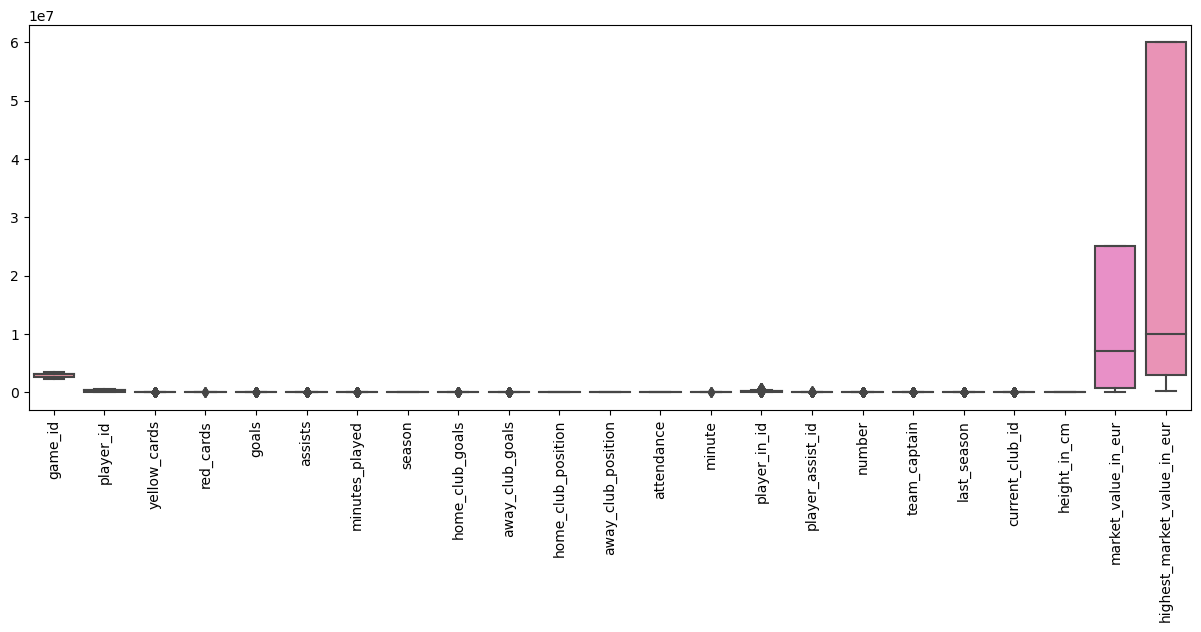

In [49]:
sns.boxplot(num_col)
plt.gcf().set_size_inches(15,5)
plt.xticks(rotation=90)

In [50]:
def iqr_winsorisation(df,thresh=1.5):
    df_out=df.copy()
    columns_to_treat=df_out.columns
    for col in columns_to_treat:
        Q1=df_out[col].quantile(0.25)
        Q3=df_out[col].quantile(0.75)
        IQR=Q3-Q1
        uo=Q3+thresh*IQR
        lo=Q1-thresh*IQR
        
        df_out.loc[df_out[col]<lo,col]=lo
        df_out.loc[df_out[col]>uo,col]=uo
    return df_out
    
df=pd.DataFrame(num_col)
#perform the ouliers treatment to all columns
Football_treated_df=iqr_winsorisation(df.copy())
Football_treated_df


,game_id,player_id,date,yellow_cards,red_cards,goals,assists,minutes_played,season,home_club_goals,...,player_assist_id,number,team_captain,last_season,current_club_id,date_of_birth,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date
0,2224732,161244.0,2012-07-14,0,0,1.0,0,90.0,2012.0,6,...,48994.911565,16.57135,0.0,2023,1325,1988-10-20,177.0,1.058815e+07,750000,2025-12-29 10:03:04.241
1,2224569,161244.0,2012-07-22,0,0,0.0,0,90.0,2012.0,1,...,48994.911565,16.57135,0.0,2023,1325,1988-10-20,177.0,1.058815e+07,750000,2025-12-29 10:03:04.241
2,2224575,161244.0,2012-08-06,0,0,0.0,0,85.0,2012.0,0,...,48994.911565,16.57135,0.0,2023,1325,1988-10-20,177.0,1.058815e+07,750000,2025-12-29 10:03:04.241
3,2224579,161244.0,2012-08-12,0,0,0.0,0,90.0,2012.0,0,...,48994.911565,16.57135,0.0,2023,1325,1988-10-20,177.0,1.058815e+07,750000,2025-12-29 10:03:04.241
4,2224540,161244.0,2012-08-20,0,0,1.0,0,90.0,2012.0,1,...,48994.911565,16.57135,0.0,2023,1325,1988-10-20,177.0,1.058815e+07,750000,2025-12-29 10:03:04.241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4355,3450613,315762.0,2020-09-20,0,0,0.0,0,58.0,2020.0,4,...,48994.911565,14.00000,0.0,2023,940,1998-05-23,177.0,3.000000e+06,3000000,2026-06-30 00:00:00.000
4356,3450613,315762.0,2020-09-20,0,0,0.0,0,58.0,2020.0,4,...,48994.911565,14.00000,0.0,2023,940,1998-05-23,177.0,3.000000e+06,3000000,2026-06-30 00:00:00.000
4357,3450613,315762.0,2020-09-20,0,0,0.0,0,58.0,2020.0,4,...,48994.911565,14.00000,0.0,2023,940,1998-05-23,177.0,3.000000e+06,3000000,2026-06-30 00:00:00.000
4358,3450613,315762.0,2020-09-20,0,0,0.0,0,58.0,2020.0,4,...,48994.911565,14.00000,0.0,2023,940,1998-05-23,177.0,3.000000e+06,3000000,2026-06-30 00:00:00.000


In [51]:
Football_treated_df['yellow_cards'].unique()

array([0], dtype=int64)

In [52]:
Football_treated_df['red_cards'].unique()

array([0], dtype=int64)

In [53]:
#descriptive analysis 
def statistical_analysis(df, column1,):
    results = {}
    results['mean'] = df[column1].mean()
    results['median'] = df[column1].median()
    results['std_dev'] = df[column1].std()
    results['variance'] = df[column1].var()
    results['skewness'] = df[column1].skew()
    results['kurtosis'] = df[column1].kurtosis()
    return results


### Focus Area 1 : Performance Analysis

In [54]:
statistical_analysis(Football_df,'goals')

{'mean': 0.4846330275229358,
 'median': 0.0,
 'std_dev': 0.6391972793496168,
 'variance': 0.408573161927952,
 'skewness': 1.3598840103591034,
 'kurtosis': 2.490341875775318}

In [55]:
Football_df.columns

Index(['appearance_id', 'game_id', 'player_id', 'date', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'game_event_id', 'minute', 'type_x',
       'description', 'player_in_id', 'player_assist_id', 'game_lineups_id',
       'type_y', 'number', 'team_captain', 'position', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'date_of_birth',
       'sub_position', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date',
       'agent_name'],
      dtype='object')

### Descriptive Analysis

player_name
Christian Pulisic      1092
Emmanuel Sabbi          396
John Anthony Brooks     351
Weston McKennie         324
Jordan                  276
Name: goals, dtype: int64


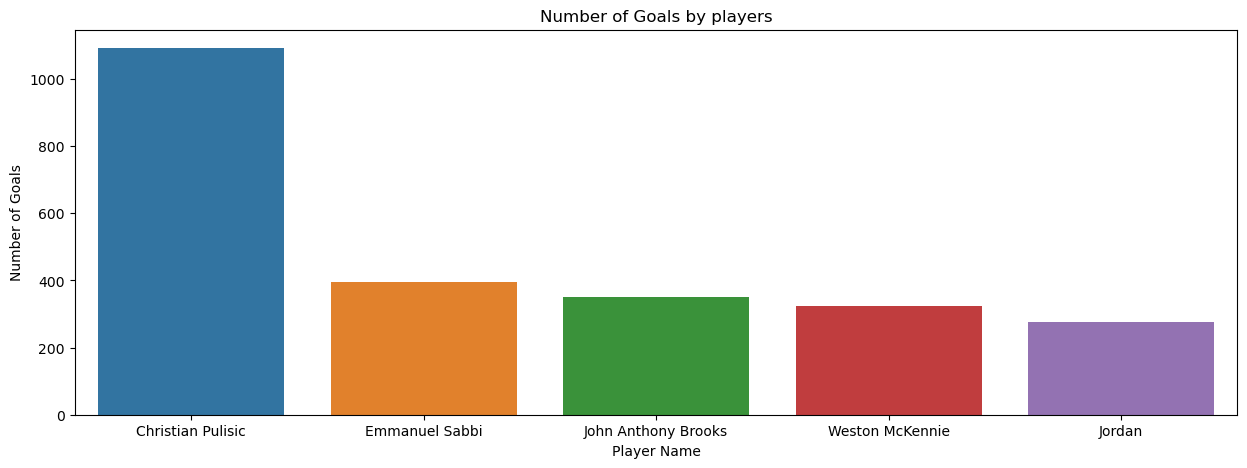

In [56]:
# Finding the number of goals for each player
player_goals = Football_df.groupby('player_name')['goals'].count().sort_values(ascending=False)
top_10 = player_goals.head(5)
print(top_10)
sns.barplot(x=top_10.index,y=top_10.values)
plt.gcf().set_size_inches(15,5)
plt.xlabel("Player Name")
plt.ylabel("Number of Goals")
plt.title("Number of Goals by players")
plt.show()

### Interpretation:
- The player 'Christian Publisic' is the most leading performer who scored more number of goals of 1092.

player_name        home_club_name            away_club_name       
Jonathan Amon      Football Club Nords       AC Horsens               3791
Christian Pulisic  Burnley Football Club     Chelsea Football Club    3780
                   verein fur leibesubungen  Borussia Dortmund        3038
Weston McKennie    Fortuna Dusseldorf        FC Schalke 04            2976
Emmanuel Sabbi     Hobro IK                  Odense Boldklub          2882
Name: minutes_played, dtype: int64


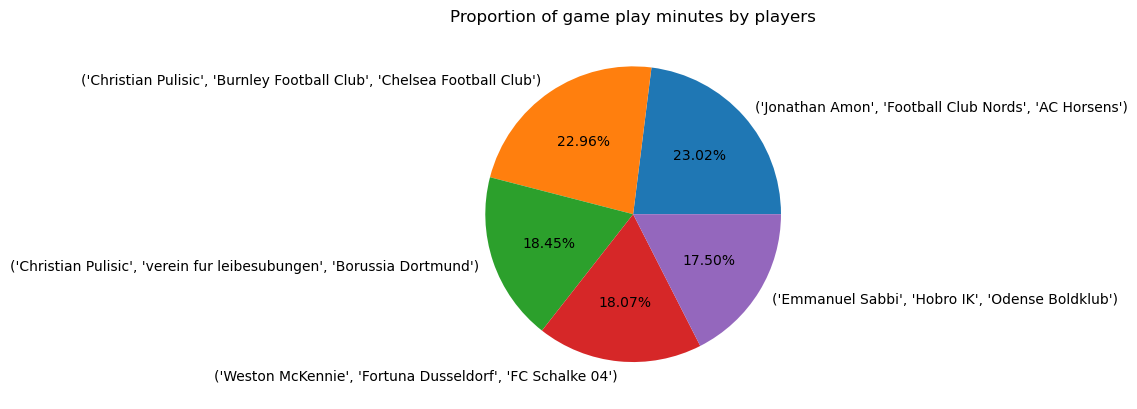

In [57]:
# Analysing top 5 players who has played more minutes.
Home_club=Football_df.groupby(['player_name','home_club_name','away_club_name'])['minutes_played'].sum().sort_values(ascending=False)
top5 = Home_club.head(5)
print(top5)
plt.pie(top5.values,labels=top5.index,autopct='%.2f%%')
plt.title("Proportion of game play minutes by players")
plt.show()

### Interpretation:
- Jonathan Amon and Christian Pulisic are the players has attains a maximum proportion of playing minutes 

            player_name  goals  assists  yellow_cards
14    Christian Pulisic    644      252            70
23       Emmanuel Sabbi    198       22            99
35               Jordan    144       48             0
33  John Anthony Brooks    143        0           117
34        Jonathan Amon    136       51            17


Text(0.5, 1.0, 'Distribution of playes goals,assist and yellow cards')

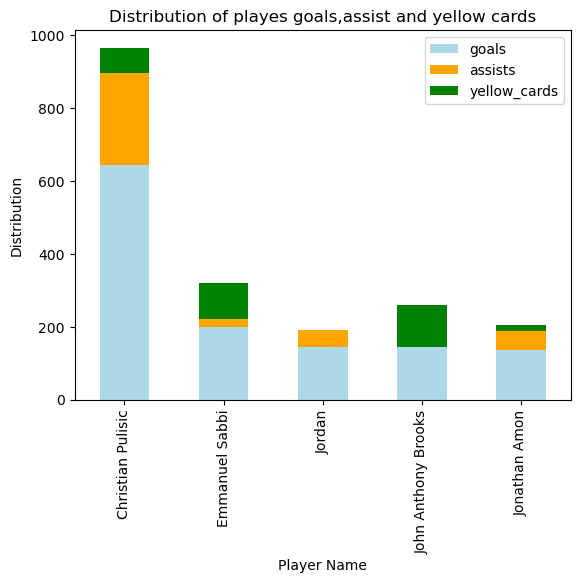

In [58]:
# Analysing the player's goals, assists and number of yellow card 
Home_club=Football_df.groupby(['player_name'])[['goals','assists','yellow_cards']].sum().reset_index().sort_values(by='goals',ascending=False)
top5 = Home_club.head(5)
print(top5)
colors = ['lightblue','orange','green']
top5.plot(x='player_name',kind='bar',stacked=True,color=colors)
plt.xlabel("Player Name")
plt.ylabel("Distribution")
plt.title("Distribution of playes goals,assist and yellow cards")

### Interpretation:
- The player 'Christian Pulisic' who is the lead performer which high goals and assists of 644 and 252.

In [59]:
Football_df.columns

Index(['appearance_id', 'game_id', 'player_id', 'date', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'game_event_id', 'minute', 'type_x',
       'description', 'player_in_id', 'player_assist_id', 'game_lineups_id',
       'type_y', 'number', 'team_captain', 'position', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'date_of_birth',
       'sub_position', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date',
       'agent_name'],
      dtype='object')

### Data Sampling, Central Limit Theorem and Normal Distribution
Given a normally distributed population of "Minutes Played" with a known mean and standard deviation, how can you calculate the probability that a randomly selected player will have played more than a specific number of minutes?

In [60]:
performance_analysis = Football_df[['goals','assists','yellow_cards','minutes_played','team_captain','home_club_goals','away_club_goals','home_club_position','away_club_position','height_in_cm','market_value_in_eur']]
performance_analysis

,goals,assists,yellow_cards,minutes_played,team_captain,home_club_goals,away_club_goals,home_club_position,away_club_position,height_in_cm,market_value_in_eur
0,1,0,0,90,0.012373,6,1,1.0,12.0,177.0,1.058815e+07
1,0,1,1,90,0.012373,1,1,1.0,2.0,177.0,1.058815e+07
2,0,0,0,85,0.012373,0,2,2.0,5.0,177.0,1.058815e+07
3,0,0,1,90,0.012373,0,1,10.0,2.0,177.0,1.058815e+07
4,1,0,0,90,0.012373,1,2,6.0,2.0,177.0,1.058815e+07
...,...,...,...,...,...,...,...,...,...,...,...
4355,0,0,0,58,0.000000,4,0,8.0,10.0,177.0,3.000000e+06
4356,0,0,0,58,0.000000,4,0,8.0,10.0,177.0,3.000000e+06
4357,0,0,0,58,0.000000,4,0,8.0,10.0,177.0,3.000000e+06
4358,0,0,0,58,0.000000,4,0,8.0,10.0,177.0,3.000000e+06


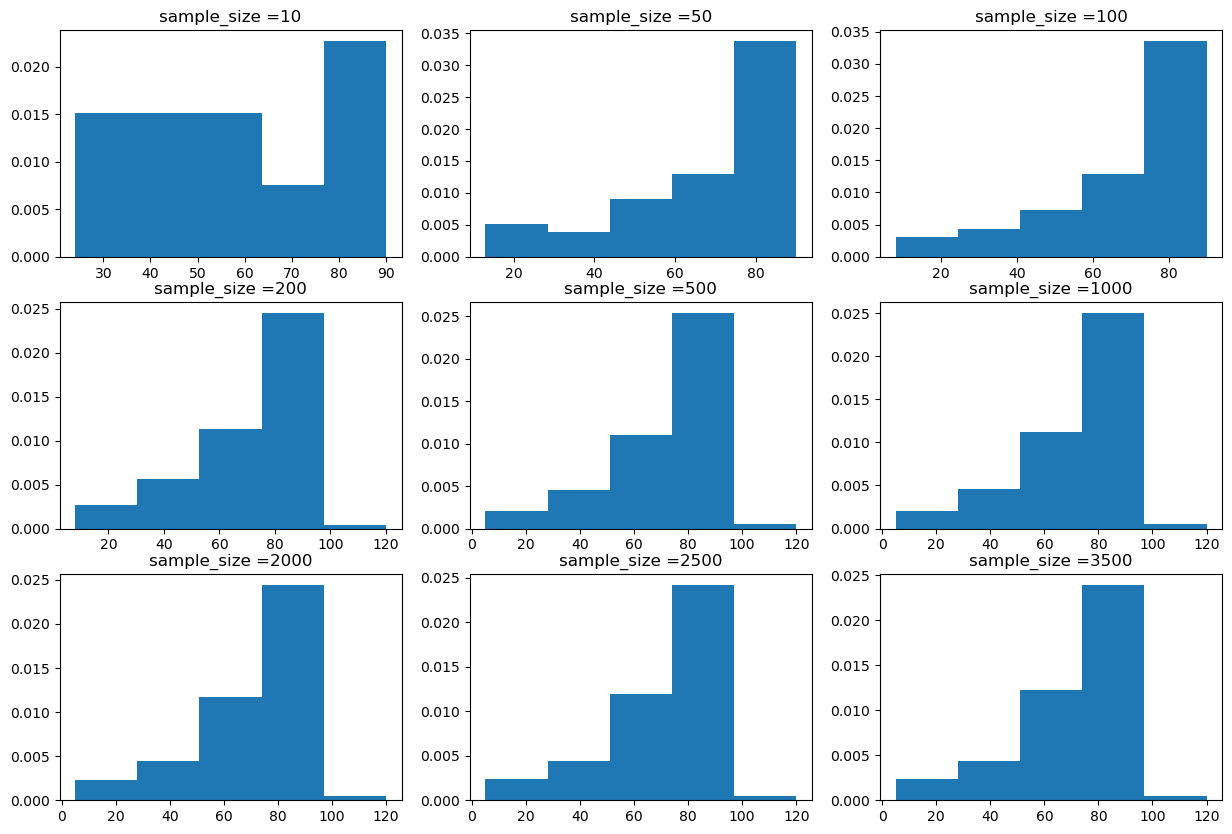

In [61]:
num = [10,50,100,200,500,1000,2000,2500,3500]
sample_data=[]
Sample_df = pd.DataFrame()

fig,ax = plt.subplots(3,3, figsize=(15,10))
for i in num:
    Sample_df = performance_analysis.sample(n=i,replace=True,random_state=1)
    sample_data.append(Sample_df['minutes_played'].tolist())

k=0
for i in range(0,3):
    for j in range(0,3):
        ax[i,j].hist(sample_data[k],5,density=True)
        ax[i,j].set_title(label="sample_size ="+str(len(sample_data[k])))
        k=k+1
plt.show()

In [62]:
minutes_played = performance_analysis['minutes_played'].tolist()
p_mean = st.mean(minutes_played)
p_medain = st.median(minutes_played)
p_std = st.stdev(minutes_played)
print("Population Mean :",p_mean)
print("Population Median :",p_medain)
print("Population Standard Deviation :",p_std)
print("Population Skewness :",sts.skew(minutes_played))
print("Population Kurtosis :",sts.kurtosis(minutes_played))

Population Mean : 71.0848623853211
Population Median : 76.0
Population Standard Deviation : 20.622746741529713
Population Skewness : -1.0138744486909423
Population Kurtosis : 0.8076605692710079


In [63]:
sample50 = performance_analysis.sample(n=200,replace=True,random_state=1)
sample_minute = sample50['minutes_played'].tolist()
s_mean = st.mean(sample_minute)
s_medain = st.median(sample_minute)
s_std = st.stdev(sample_minute)
print("Sample Mean :",s_mean)
print("Sample Median :",s_medain)
print("Sample Standard Deviation :",s_std)
print("Sample Skewness :",sts.skew(sample_minute))
print("Sample Kurtosis :",sts.kurtosis(sample_minute))

Sample Mean : 71.165
Sample Median : 77.0
Sample Standard Deviation : 21.054076700929993
Sample Skewness : -0.9641937463586935
Sample Kurtosis : 0.47467724802549993


#### Interpretation:
- Noted that mean is near around median, skewness and kurtosis is near around zero for both population and sample distribution.
- which implies that the poupulation data and sample data with sample size 200 both are normally distributed.
- Also note that the population mean = 70.8 and sample mean = 74.3, that sample mean is near around population
- All of the above are nearlly equal. So this is proving the Central Limit Theorem.

In [64]:
Samples_of200 = pd.DataFrame()
for i in range(0,15):
    Samples_of200['Sample_'+str(i)] = performance_analysis['minutes_played'].sample(n=200,replace=True).reset_index(drop=True) 

In [65]:
Samples_of200

,Sample_0,Sample_1,Sample_2,Sample_3,Sample_4,Sample_5,Sample_6,Sample_7,Sample_8,Sample_9,Sample_10,Sample_11,Sample_12,Sample_13,Sample_14
0,90,90,70,66,71,78,68,90,68,58,90,83,62,60,90
1,45,26,55,81,78,90,32,90,90,74,90,80,79,66,90
2,70,45,70,90,78,73,90,56,45,80,68,45,120,90,59
3,90,78,68,76,70,65,90,72,84,61,65,74,66,23,74
4,90,85,74,80,79,61,66,72,83,58,90,90,8,84,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,90,45,13,90,77,19,77,83,20,45,12,86,79,90,58
196,83,20,90,87,61,87,80,76,87,26,72,27,23,90,90
197,74,81,67,90,56,45,35,76,56,78,72,90,62,90,90
198,62,22,56,28,58,45,90,87,71,90,66,46,90,81,90


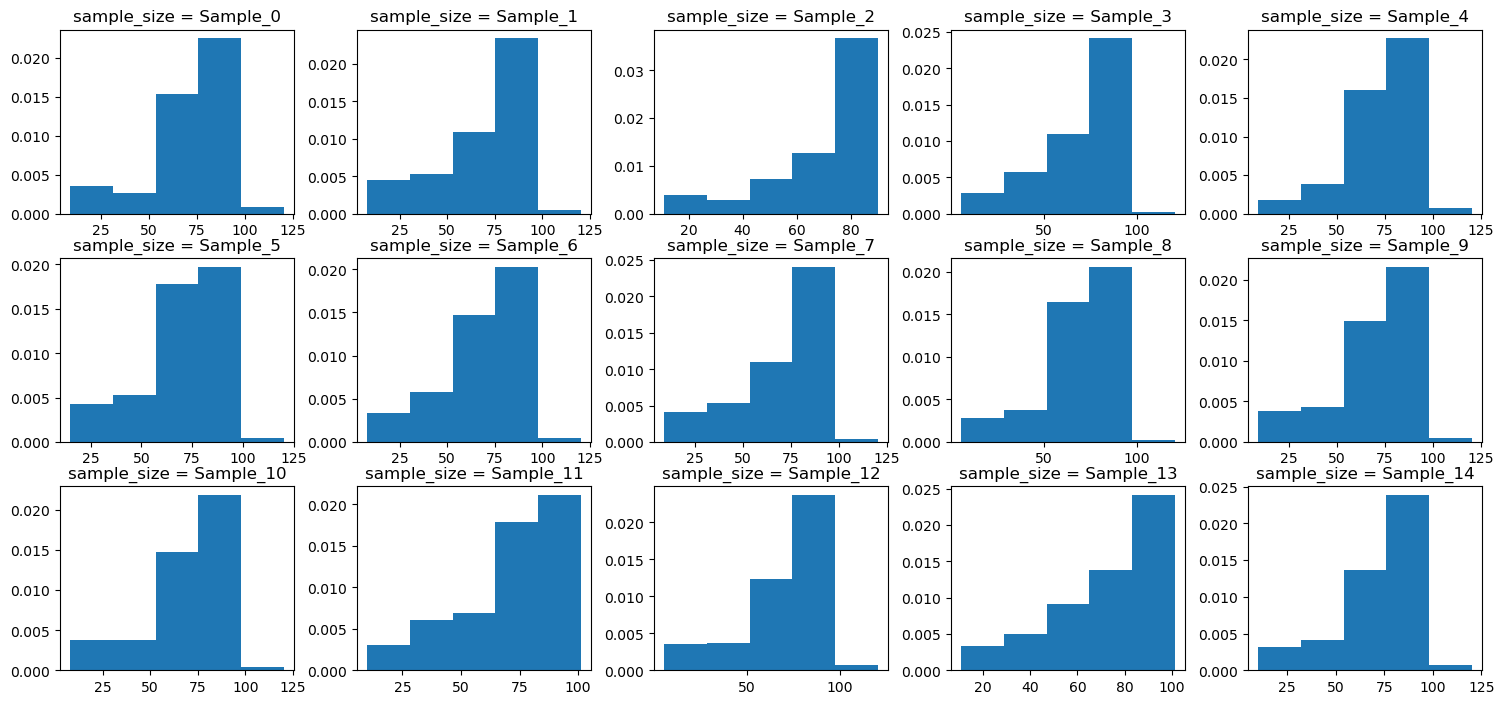

In [66]:
sample_name = Samples_of200.columns

fig,ax = plt.subplots(3,5, figsize=(15,7))
fig.tight_layout()
k=0
for i in range(0,3):
    for j in range(0,5):
        ax[i,j].hist(Samples_of200[sample_name[k]],5,density=True)
        ax[i,j].set_title(label="sample_size = "+str(sample_name[k]))
        k=k+1
plt.show()

In [67]:
sample_name = Samples_of200.columns
sample_name

Index(['Sample_0', 'Sample_1', 'Sample_2', 'Sample_3', 'Sample_4', 'Sample_5',
       'Sample_6', 'Sample_7', 'Sample_8', 'Sample_9', 'Sample_10',
       'Sample_11', 'Sample_12', 'Sample_13', 'Sample_14'],
      dtype='object')

In [68]:
sample_mean=[]
sample_name = Samples_of200.columns
for i in sample_name:
    sample_mean.append(Samples_of200[i].mean())
samples_mean = pd.DataFrame()
samples_mean.insert(0,'Sample_Name',sample_name)
samples_mean.insert(1,'Sample_Mean',sample_mean)

In [69]:
samples_mean

,Sample_Name,Sample_Mean
0,Sample_0,72.110
1,Sample_1,68.690
2,Sample_2,71.505
3,Sample_3,70.700
4,Sample_4,72.525
5,Sample_5,69.825
6,Sample_6,69.245
7,Sample_7,69.955
8,Sample_8,70.210
9,Sample_9,69.810


#### Standard Deviation for all the sample mean

In [70]:
samples_means_std = st.stdev(samples_mean['Sample_Mean'])
print(f"Samples Mean's Standard Deviation :{samples_means_std:.2f}")

Samples Mean's Standard Deviation :1.15


#### Calculate sample Standard Deviation from population parameter

In [71]:
calculated_std = p_std/sqrt(50)
print(f"Calculated Sample Standard Deviation :{calculated_std:.2f}")

Calculated Sample Standard Deviation :2.92


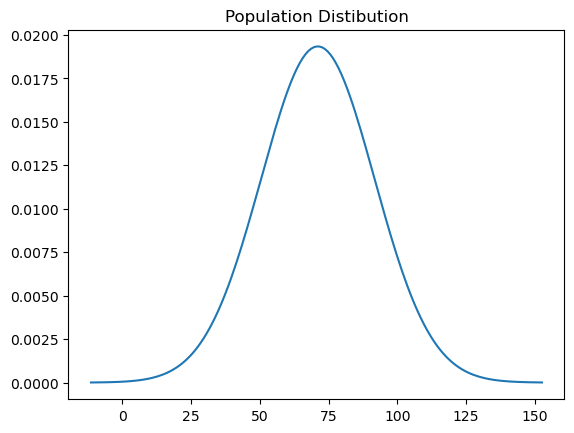

In [72]:
lower_p=p_mean-4*p_std
upper_p=p_mean+4*p_std
norm_p=np.arange(lower_p,upper_p)
plt.plot(norm_p,norm.pdf(norm_p,p_mean,p_std))
plt.title("Population Distibution")
plt.show()

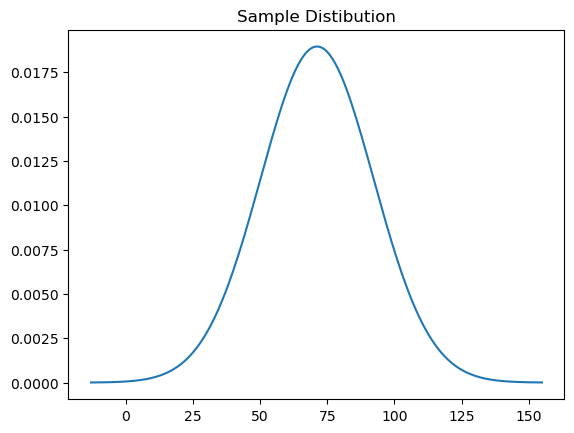

In [73]:
lower_p=s_mean-4*s_std
upper_p=s_mean+4*s_std
norm_p=np.arange(lower_p,upper_p)
plt.plot(norm_p,norm.pdf(norm_p,s_mean,s_std))
plt.title("Sample Distibution")
plt.show()

## Interpretation:
- We found calculated samples mean standard deviation is near around samples standard deviation calculated using population standard deviation .
- As sample size increasers the standard deviation of the samples becomes smaller and smaller because the population is being divided by the larger and larger values of the sqrt(n)
- i The sample Distribution is tending to be normal distribution curve irrespective of the type of population distribution when the sample size is greater than 100.
- ii Sample Mean is near around population mean
- iii The standard deviation of sample mean is the standard deviation of population is divided by the sqrt of sample size
- The above property proves the central limit theorem for a sampling distibution
- Using central limit theorem we can justify the sample data to properly representation of population data. So this sample represent the properly the population and further we can procees for analysis  using this sample data. 

### Performance analysis
### Logistic Regression for classification

#### Objective Question:
Given a logistic regression model predicting the probability of getting card in football matches, how well does it capture the influence of factors like goals, player positions, and match aggression levels on the likelihood of a player receiving a card?

In [74]:
Football_df['yellow_cards'].unique()

array([0, 1, 2], dtype=int64)

In [75]:
Football_df['red_cards'].unique()

array([0, 1], dtype=int64)

In [76]:
Football_df['Cards'] = Football_df['yellow_cards'] + Football_df['red_cards']

In [77]:
Football_df['Cards'].unique()

array([0, 1, 2], dtype=int64)

In [78]:
log_data = Football_df[['goals','assists','yellow_cards','red_cards','Cards','minutes_played','team_captain','home_club_goals','away_club_goals','height_in_cm','market_value_in_eur']]

In [79]:
log_data.loc[log_data['Cards']>0,'Cards']=1

In [80]:
log_data['Cards'].unique()

array([0, 1], dtype=int64)

In [81]:
target = log_data[['Cards']]


In [82]:
log_data = log_data.drop('Cards',axis=1)
log_data

,goals,assists,yellow_cards,red_cards,minutes_played,team_captain,home_club_goals,away_club_goals,height_in_cm,market_value_in_eur
0,1,0,0,0,90,0.012373,6,1,177.0,1.058815e+07
1,0,1,1,0,90,0.012373,1,1,177.0,1.058815e+07
2,0,0,0,0,85,0.012373,0,2,177.0,1.058815e+07
3,0,0,1,0,90,0.012373,0,1,177.0,1.058815e+07
4,1,0,0,0,90,0.012373,1,2,177.0,1.058815e+07
...,...,...,...,...,...,...,...,...,...,...
4355,0,0,0,0,58,0.000000,4,0,177.0,3.000000e+06
4356,0,0,0,0,58,0.000000,4,0,177.0,3.000000e+06
4357,0,0,0,0,58,0.000000,4,0,177.0,3.000000e+06
4358,0,0,0,0,58,0.000000,4,0,177.0,3.000000e+06


In [83]:
column = log_data.columns
scaler = StandardScaler()
Lr_Scaled_df = scaler.fit_transform(log_data)
Lr_Scaled_df = pd.DataFrame(Lr_Scaled_df,columns = column)
Lr_Scaled_df

,goals,assists,yellow_cards,red_cards,minutes_played,team_captain,home_club_goals,away_club_goals,height_in_cm,market_value_in_eur
0,0.806365,-0.376311,-0.456656,-0.030303,0.917303,-5.154565e-17,2.623527,-0.374568,-0.790696,0.000000
1,-0.758277,2.371959,2.135820,-0.030303,0.917303,-5.154565e-17,-0.587392,-0.374568,-0.790696,0.000000
2,-0.758277,-0.376311,-0.456656,-0.030303,0.674824,-5.154565e-17,-1.229576,0.295291,-0.790696,0.000000
3,-0.758277,-0.376311,2.135820,-0.030303,0.917303,-5.154565e-17,-1.229576,-0.374568,-0.790696,0.000000
4,0.806365,-0.376311,-0.456656,-0.030303,0.917303,-5.154565e-17,-0.587392,0.295291,-0.790696,0.000000
...,...,...,...,...,...,...,...,...,...,...
4355,-0.758277,-0.376311,-0.456656,-0.030303,-0.634560,-1.225490e-01,1.339159,-1.044426,-0.790696,-0.732937
4356,-0.758277,-0.376311,-0.456656,-0.030303,-0.634560,-1.225490e-01,1.339159,-1.044426,-0.790696,-0.732937
4357,-0.758277,-0.376311,-0.456656,-0.030303,-0.634560,-1.225490e-01,1.339159,-1.044426,-0.790696,-0.732937
4358,-0.758277,-0.376311,-0.456656,-0.030303,-0.634560,-1.225490e-01,1.339159,-1.044426,-0.790696,-0.732937


In [84]:
Lr_Scaled_df = pd.concat([Lr_Scaled_df,target],axis=1)
Lr_Scaled_df

,goals,assists,yellow_cards,red_cards,minutes_played,team_captain,home_club_goals,away_club_goals,height_in_cm,market_value_in_eur,Cards
0,0.806365,-0.376311,-0.456656,-0.030303,0.917303,-5.154565e-17,2.623527,-0.374568,-0.790696,0.000000,0
1,-0.758277,2.371959,2.135820,-0.030303,0.917303,-5.154565e-17,-0.587392,-0.374568,-0.790696,0.000000,1
2,-0.758277,-0.376311,-0.456656,-0.030303,0.674824,-5.154565e-17,-1.229576,0.295291,-0.790696,0.000000,0
3,-0.758277,-0.376311,2.135820,-0.030303,0.917303,-5.154565e-17,-1.229576,-0.374568,-0.790696,0.000000,1
4,0.806365,-0.376311,-0.456656,-0.030303,0.917303,-5.154565e-17,-0.587392,0.295291,-0.790696,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
4355,-0.758277,-0.376311,-0.456656,-0.030303,-0.634560,-1.225490e-01,1.339159,-1.044426,-0.790696,-0.732937,0
4356,-0.758277,-0.376311,-0.456656,-0.030303,-0.634560,-1.225490e-01,1.339159,-1.044426,-0.790696,-0.732937,0
4357,-0.758277,-0.376311,-0.456656,-0.030303,-0.634560,-1.225490e-01,1.339159,-1.044426,-0.790696,-0.732937,0
4358,-0.758277,-0.376311,-0.456656,-0.030303,-0.634560,-1.225490e-01,1.339159,-1.044426,-0.790696,-0.732937,0


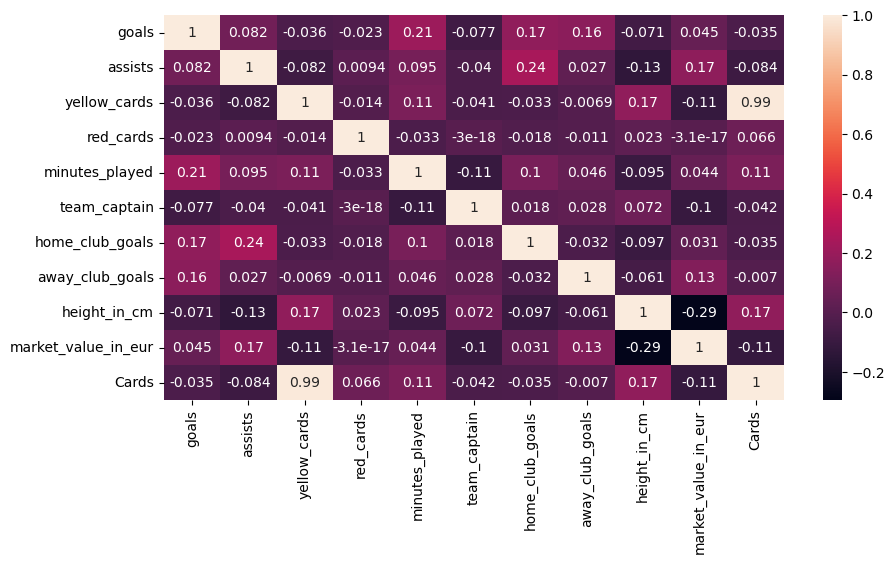

In [85]:
plt.figure(figsize=(10,5))
sns.heatmap(Lr_Scaled_df.corr(),annot=True)
plt.show()

### Interpretation:
- While checking the multicollinearity the colum yellow card is highly correlated with dependent column Cards so here, the yellow cards column is removed for further analysis.

In [86]:
Lr_Scaled_df = Lr_Scaled_df.drop('yellow_cards',axis=1)


In [87]:
Lr_Scaled_df

,goals,assists,red_cards,minutes_played,team_captain,home_club_goals,away_club_goals,height_in_cm,market_value_in_eur,Cards
0,0.806365,-0.376311,-0.030303,0.917303,-5.154565e-17,2.623527,-0.374568,-0.790696,0.000000,0
1,-0.758277,2.371959,-0.030303,0.917303,-5.154565e-17,-0.587392,-0.374568,-0.790696,0.000000,1
2,-0.758277,-0.376311,-0.030303,0.674824,-5.154565e-17,-1.229576,0.295291,-0.790696,0.000000,0
3,-0.758277,-0.376311,-0.030303,0.917303,-5.154565e-17,-1.229576,-0.374568,-0.790696,0.000000,1
4,0.806365,-0.376311,-0.030303,0.917303,-5.154565e-17,-0.587392,0.295291,-0.790696,0.000000,0
...,...,...,...,...,...,...,...,...,...,...
4355,-0.758277,-0.376311,-0.030303,-0.634560,-1.225490e-01,1.339159,-1.044426,-0.790696,-0.732937,0
4356,-0.758277,-0.376311,-0.030303,-0.634560,-1.225490e-01,1.339159,-1.044426,-0.790696,-0.732937,0
4357,-0.758277,-0.376311,-0.030303,-0.634560,-1.225490e-01,1.339159,-1.044426,-0.790696,-0.732937,0
4358,-0.758277,-0.376311,-0.030303,-0.634560,-1.225490e-01,1.339159,-1.044426,-0.790696,-0.732937,0


In [88]:
X_log = Lr_Scaled_df.drop('Cards', axis=1) 
y_log = Lr_Scaled_df['Cards']

In [89]:
X_train_log,X_test_log,y_train_log,y_test_log = train_test_split(X_log,y_log,train_size=.80,random_state=200)

In [90]:
logreg = LogisticRegression().fit(X_train_log,y_train_log)

In [91]:
y_predict_log = logreg.predict(X_test_log)
y_predict_log

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [92]:
print(confusion_matrix(y_test_log,y_predict_log))

[[729   4]
 [137   2]]


In [93]:
tn,fp,fn,tp = confusion_matrix(y_test_log,y_predict_log).ravel()
print(tn,fp,fn,tp)

729 4 137 2


### Interpretation:
- While evaluating the logistic regression model through confustion matrix, it came to know that the true postive(tn) is high while compare to the other matrices like fp,fn and tp
- This suggest that the model's overall performance is well and it correctly classifing the instances in both the positive and negative categories.

In [94]:
print("Precision Score :",precision_score(y_test_log,y_predict_log,average='weighted'))
print("Recall Score :",recall_score(y_test_log,y_predict_log,average='weighted'))
print("F1-Score :",f1_score(y_test_log,y_predict_log,average='weighted'))
print("Accuracy :",accuracy_score(y_test_log,y_predict_log))

Precision Score : 0.7607497121992217
Recall Score : 0.838302752293578
F1-Score : 0.7708697938584281
Accuracy : 0.838302752293578


In [95]:
roc = roc_auc_score(y_test_log,logreg.predict_proba(X_test_log)[:,1])
print("ROC-AUC Score :",roc)

ROC-AUC Score : 0.6708363186667583


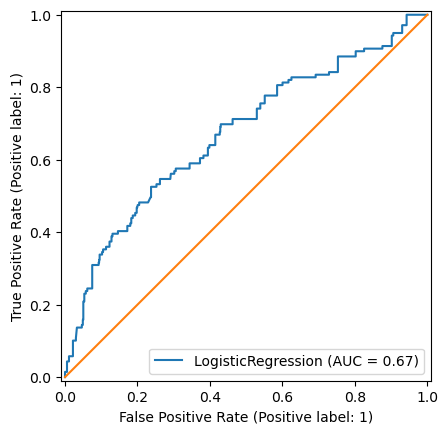

In [96]:
RocCurveDisplay.from_estimator(logreg,X_test_log,y_test_log)
plt.plot([0,1])
plt.show()

### Interpretation:
- Precision: This score represents the proportion of true positive predictions among all positive instances. A value of 0.76 indicates 76% that the model correctly predict any positive instances.
- Recall: This score measures the proportion of actual positive instances that were correctly identified by the model. A value of .83 suggests that the model identify 83% any of the true positive cases.
- F1-Score: This score is the harmonic mean of precision and recall, providing a balance between the two. A value of 0.77 indicates that the model performs better in terms of both precision and recall.
- Accuracy: This score represents the overall proportion of correct predictions (both true positives and true negatives) made by the model. An accuracy suggests that the model correctly predicted the outcome in 83.83% of the cases.
- ROC-AUC Score: This score measures the model's ability to distinguish between positive and negative classes. A higher ROC-AUC score indicates better performance. An ROC-AUC of 0.67 suggests that the model has good discriminatory power.

###  Focus Area 2 : Player Profile and Market Value
### Descripitive Analysis

In [97]:
Football_df.columns

Index(['appearance_id', 'game_id', 'player_id', 'date', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'game_event_id', 'minute', 'type_x',
       'description', 'player_in_id', 'player_assist_id', 'game_lineups_id',
       'type_y', 'number', 'team_captain', 'position', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'date_of_birth',
       'sub_position', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'Cards'],
      dtype='object')

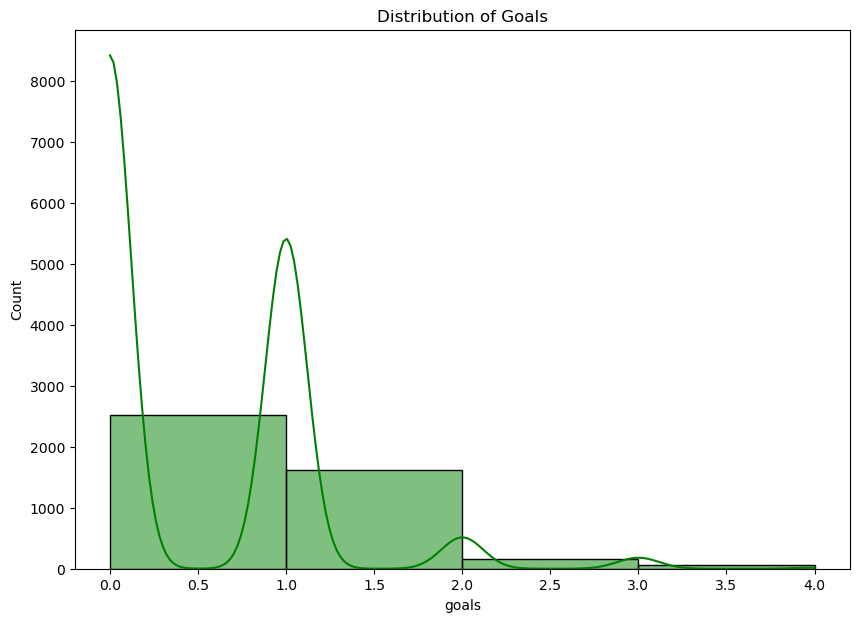

In [98]:
# Visuvalizing the goals distribution
plt.figure(figsize=(10,7))
sns.histplot(Football_df['goals'],bins=4,kde=True,color='green')
plt.title("Distribution of Goals")
plt.show()

### Interpretation:
- The histogram exhibits multiple peaks, suggesting the presence of distinct subgroups within the data.
- The distribution is skewed to the right. This means there are a few individuals with very high goals, pulling the tail of the distribution towards the right

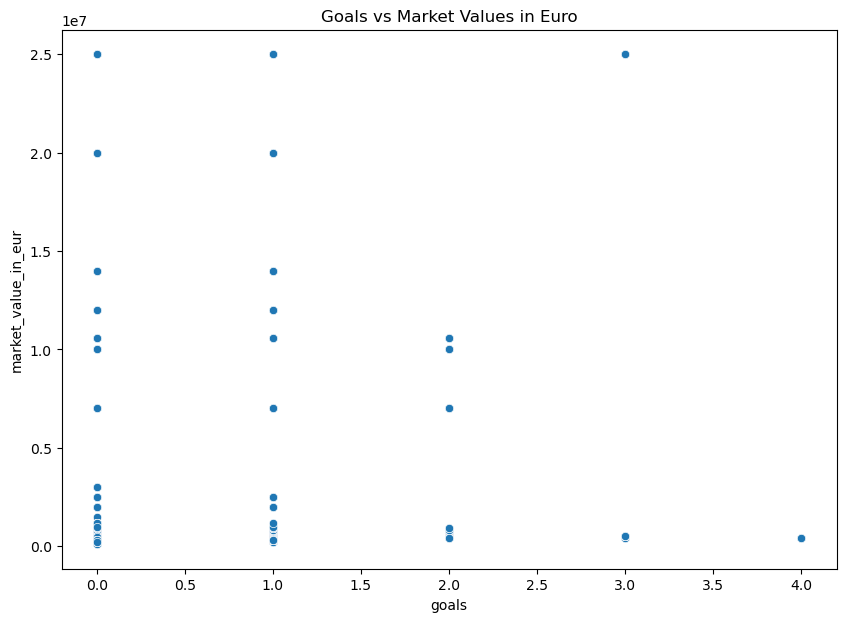

In [99]:
# Finding relation between Goals and Market values
plt.figure(figsize=(10,7))
sns.scatterplot(x='goals',y='market_value_in_eur',data=Football_df)
plt.title("Goals vs Market Values in Euro")
plt.show()

### Interpretation:
- There is a weak positive correlation between goals scored and market value. 
- This means that, generally, players who score more goals tend to have higher market values. However, the relationship is not very strong.
- The points are quite scattered, indicating that there's a lot of variability in market values, suggest that other factors are influsing the market values.

### Making prediction by Linear and Multilinear Models 

### Objective Question
For a linear and multilinear regression model predicting player market value based on factors like age, goals scored, assists, and league performance, how well do these models account for the non-linear relationships that likely exist between these factors and a player's market value?

In [100]:
num_col.columns

Index(['game_id', 'player_id', 'date', 'yellow_cards', 'red_cards', 'goals',
       'assists', 'minutes_played', 'season', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'attendance', 'minute', 'player_in_id', 'player_assist_id', 'number',
       'team_captain', 'last_season', 'current_club_id', 'date_of_birth',
       'height_in_cm', 'market_value_in_eur', 'highest_market_value_in_eur',
       'contract_expiration_date'],
      dtype='object')

In [101]:
num_col['red_cards'].unique()

array([0, 1], dtype=int64)

In [102]:
player_profile = Football_df[['position','goals','assists','yellow_cards','height_in_cm','team_captain','foot','minutes_played','home_club_name','away_club_name','attendance','market_value_in_eur']]

In [103]:
player_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4360 entries, 0 to 4359
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   position             4360 non-null   object 
 1   goals                4360 non-null   int64  
 2   assists              4360 non-null   int64  
 3   yellow_cards         4360 non-null   int64  
 4   height_in_cm         4360 non-null   float64
 5   team_captain         4360 non-null   float64
 6   foot                 4360 non-null   object 
 7   minutes_played       4360 non-null   int64  
 8   home_club_name       4360 non-null   object 
 9   away_club_name       4360 non-null   object 
 10  attendance           4360 non-null   float64
 11  market_value_in_eur  4360 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 408.9+ KB


In [104]:
# Feature Engeneering
cat_col = player_profile.select_dtypes(include='object')
for col in cat_col.columns:
    label_encoder = preprocessing.LabelEncoder()
    player_profile[col+'_enc'] = label_encoder.fit_transform(player_profile[col])

player_profile = player_profile.drop(cat_col,axis=1)
player_profile

,goals,assists,yellow_cards,height_in_cm,team_captain,minutes_played,attendance,market_value_in_eur,position_enc,foot_enc,home_club_name_enc,away_club_name_enc
0,1,0,0,177.0,0.012373,90,2995.0,1.058815e+07,8,2,136,122
1,0,1,1,177.0,0.012373,90,6575.0,1.058815e+07,8,2,136,59
2,0,0,0,177.0,0.012373,85,4033.0,1.058815e+07,8,2,136,4
3,0,0,1,177.0,0.012373,90,7667.0,1.058815e+07,8,2,31,142
4,1,0,0,177.0,0.012373,90,3638.0,1.058815e+07,8,2,136,108
...,...,...,...,...,...,...,...,...,...,...,...,...
4355,0,0,0,177.0,0.000000,58,3908.0,3.000000e+06,4,2,169,75
4356,0,0,0,177.0,0.000000,58,3908.0,3.000000e+06,1,2,169,75
4357,0,0,0,177.0,0.000000,58,3908.0,3.000000e+06,7,2,169,75
4358,0,0,0,177.0,0.000000,58,3908.0,3.000000e+06,7,2,169,75


In [105]:
player_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4360 entries, 0 to 4359
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   goals                4360 non-null   int64  
 1   assists              4360 non-null   int64  
 2   yellow_cards         4360 non-null   int64  
 3   height_in_cm         4360 non-null   float64
 4   team_captain         4360 non-null   float64
 5   minutes_played       4360 non-null   int64  
 6   attendance           4360 non-null   float64
 7   market_value_in_eur  4360 non-null   float64
 8   position_enc         4360 non-null   int32  
 9   foot_enc             4360 non-null   int32  
 10  home_club_name_enc   4360 non-null   int32  
 11  away_club_name_enc   4360 non-null   int32  
dtypes: float64(4), int32(4), int64(4)
memory usage: 340.8 KB


In [106]:
# Data Scaling
col = player_profile.columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(player_profile) 
df_scaled = pd.DataFrame(df_scaled,columns=col)
df_scaled

,goals,assists,yellow_cards,height_in_cm,team_captain,minutes_played,attendance,market_value_in_eur,position_enc,foot_enc,home_club_name_enc,away_club_name_enc
0,0.806365,-0.376311,-0.456656,-0.790696,-5.154565e-17,0.917303,-1.202266,0.000000,0.692435,0.406683,1.242572,0.734929
1,-0.758277,2.371959,2.135820,-0.790696,-5.154565e-17,0.917303,-1.050214,0.000000,0.692435,0.406683,1.242572,-0.391008
2,-0.758277,-0.376311,-0.456656,-0.790696,-5.154565e-17,0.674824,-1.158180,0.000000,0.692435,0.406683,1.242572,-1.373968
3,-0.758277,-0.376311,2.135820,-0.790696,-5.154565e-17,0.917303,-1.003833,0.000000,0.692435,0.406683,-0.818694,1.092369
4,0.806365,-0.376311,-0.456656,-0.790696,-5.154565e-17,0.917303,-1.174956,0.000000,0.692435,0.406683,1.242572,0.484721
...,...,...,...,...,...,...,...,...,...,...,...,...
4355,-0.758277,-0.376311,-0.456656,-0.790696,-1.225490e-01,-0.634560,-1.163489,-0.732937,-0.811621,0.406683,1.890399,-0.105055
4356,-0.758277,-0.376311,-0.456656,-0.790696,-1.225490e-01,-0.634560,-1.163489,-0.732937,-1.939662,0.406683,1.890399,-0.105055
4357,-0.758277,-0.376311,-0.456656,-0.790696,-1.225490e-01,-0.634560,-1.163489,-0.732937,0.316421,0.406683,1.890399,-0.105055
4358,-0.758277,-0.376311,-0.456656,-0.790696,-1.225490e-01,-0.634560,-1.163489,-0.732937,0.316421,0.406683,1.890399,-0.105055


In [107]:
# Checking Mullticolinearity
df_scaled.corr()>7

,goals,assists,yellow_cards,height_in_cm,team_captain,minutes_played,attendance,market_value_in_eur,position_enc,foot_enc,home_club_name_enc,away_club_name_enc
goals,False,False,False,False,False,False,False,False,False,False,False,False
assists,False,False,False,False,False,False,False,False,False,False,False,False
yellow_cards,False,False,False,False,False,False,False,False,False,False,False,False
height_in_cm,False,False,False,False,False,False,False,False,False,False,False,False
team_captain,False,False,False,False,False,False,False,False,False,False,False,False
minutes_played,False,False,False,False,False,False,False,False,False,False,False,False
attendance,False,False,False,False,False,False,False,False,False,False,False,False
market_value_in_eur,False,False,False,False,False,False,False,False,False,False,False,False
position_enc,False,False,False,False,False,False,False,False,False,False,False,False
foot_enc,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

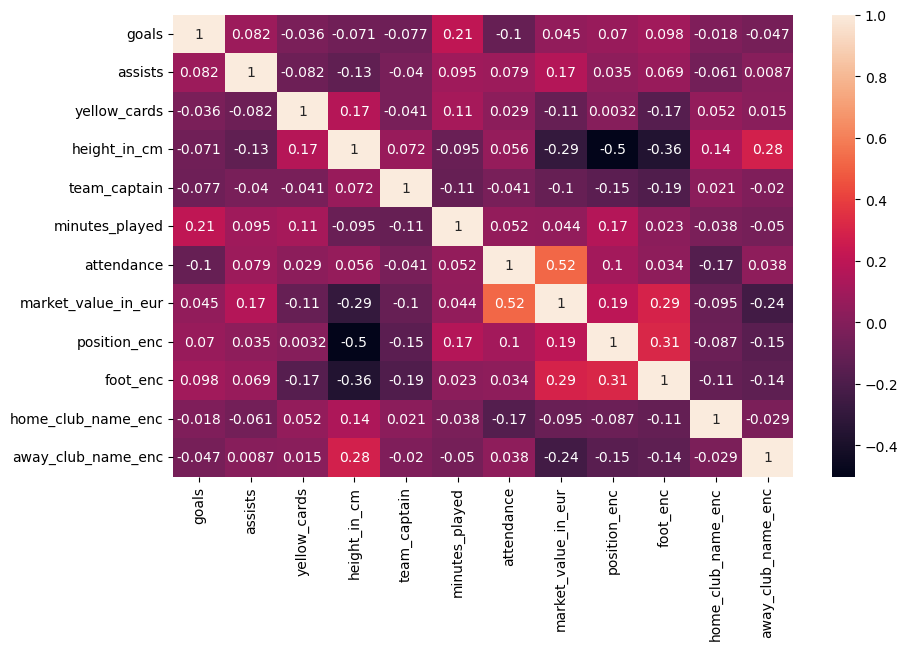

In [108]:
plt.figure(figsize=(10,6))
sns.heatmap(df_scaled.corr(),annot=True)

In [109]:
abs(df_scaled.corr()[['market_value_in_eur']].sort_values('market_value_in_eur',ascending=False))

,market_value_in_eur
market_value_in_eur,1.000000
attendance,0.520231
foot_enc,0.293859
position_enc,0.191984
assists,0.166278
goals,0.045351
minutes_played,0.044266
home_club_name_enc,0.095021
team_captain,0.104559
yellow_cards,0.108153


### Linear Regression Model
### 1-Feature : attendance

In [110]:
X1 = np.array(df_scaled['attendance']).reshape(-1,1)
y = np.array(df_scaled['market_value_in_eur'])

In [111]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y,train_size=.7,random_state=100)

In [112]:
# Model Building
f1_model = LinearRegression().fit(X_train1,y_train1)
y_predict1 = f1_model.predict(X_test1)
print("Intercept :",f1_model.intercept_)
print("Slope :",f1_model.coef_)

Intercept : 0.002284357831826841
Slope : [0.51455781]


In [113]:
# Model Evaluation
MSE = mean_squared_error(y_test1,y_predict1)
MAE = mean_absolute_error(y_test1,y_predict1)
RMSE = sqrt(MSE)
R2 = mean_squared_error(y_test1,y_predict1)
print("MSE :",MSE)
print("MAE :",MAE)
print("RMSE :",RMSE)
print("R2 :",R2)

MSE : 0.7259197513503244
MAE : 0.7122663087024484
RMSE : 0.852009243700046
R2 : 0.7259197513503244


### Multiple linear Regression Model

### 2-Features : attendance,foot_enc

In [114]:
X2 = np.array(df_scaled[['attendance','foot_enc']]).reshape(-1,2)
y = np.array(df_scaled['market_value_in_eur'])

In [115]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(X2,y,train_size=.7,random_state=100)

In [116]:
# Model Building
f2_model = LinearRegression().fit(X_train2,y_train2)
y_predict2 = f2_model.predict(X_test2)
print("Intercept :",f2_model.intercept_)
print("Slope :",f2_model.coef_)

Intercept : 0.0031148780060168482
Slope : [0.508641   0.27407241]


In [117]:
# Model Evaluation
MSE = mean_squared_error(y_test2,y_predict2)
MAE = mean_absolute_error(y_test2,y_predict2)
RMSE = sqrt(MSE)
R2 = mean_squared_error(y_test2,y_predict2)
print("MSE :",MSE)
print("MAE :",MAE)
print("RMSE :",RMSE)
print("R2 :",R2)

MSE : 0.6511624470445846
MAE : 0.66313102893755
RMSE : 0.8069463718516767
R2 : 0.6511624470445846


### 3 - Features : attendance,foot_enc,away_club_name_enc

In [118]:
X3 = np.array(df_scaled[['attendance','foot_enc','away_club_name_enc']]).reshape(-1,3)
y = np.array(df_scaled['market_value_in_eur'])

In [119]:
X_train3,X_test3,y_train3,y_test3 = train_test_split(X3,y,train_size=.8,random_state=0)

In [120]:
# Model Building
f3_model = LinearRegression().fit(X_train3,y_train3)
y_predict3 = f3_model.predict(X_test3)
print("Intercept :",f3_model.intercept_)
print("Slope :",f3_model.coef_)

Intercept : 0.002183657346023484
Slope : [ 0.52472381  0.25535864 -0.23617024]


In [121]:
# Model Evaluation
MSE = mean_squared_error(y_test3,y_predict3)
MAE = mean_absolute_error(y_test3,y_predict3)
RMSE = sqrt(MSE)
R2 = mean_squared_error(y_test3,y_predict3)
print("MSE :",MSE)
print("MAE :",MAE)
print("RMSE :",RMSE)
print("R2 :",R2)

MSE : 0.6278246596838739
MAE : 0.6335506211376204
RMSE : 0.7923538727638516
R2 : 0.6278246596838739


### 4 - Features : attendance,foot_enc,away_club_name_enc,height_in_cm

In [122]:
X4 = np.array(df_scaled[['attendance','foot_enc','away_club_name_enc','height_in_cm']]).reshape(-1,4)
y = np.array(df_scaled['market_value_in_eur'])

In [123]:
X_train4,X_test4,y_train4,y_test4 = train_test_split(X4,y,train_size=.8,random_state=0)

In [124]:
# Model Building
f4_model = LinearRegression().fit(X_train4,y_train4)
y_predict4 = f4_model.predict(X_test4)
print("Intercept :",f4_model.intercept_)
print("Slope :",f4_model.coef_)

Intercept : -0.0010276517950742916
Slope : [ 0.53608641  0.18767421 -0.19054024 -0.19836955]


In [125]:
# Model Evaluation
MSE = mean_squared_error(y_test4,y_predict4)
MAE = mean_absolute_error(y_test4,y_predict4)
RMSE = sqrt(MSE)
R2 = mean_squared_error(y_test4,y_predict4)
print("MSE :",MSE)
print("MAE :",MAE)
print("RMSE :",RMSE)
print("R2 :",R2)

MSE : 0.5742777970709454
MAE : 0.6156475749316391
RMSE : 0.7578111882724782
R2 : 0.5742777970709454


In [126]:
def calculate_residuals(model,features,labels):
    predictions = model.predict(features)
    df_result = pd.DataFrame({'Actual':labels,'Predicted':predictions})
    df_result['Residuals'] = abs(df_result['Actual']) - abs(df_result['Predicted'])
    return df_result
def linear_assumption(model,features,labels):
    df_result = calculate_residuals(model,features,labels)
    sns.lmplot(x='Actual',y='Predicted',data=df_result,fit_reg=False)
    line= np.arange(df_result.min().min(),df_result.max().max())
    plt.plot(line,line,c='darkorange',linestyle='--')
    plt.title("Actual vs Predicted")
    plt.show()

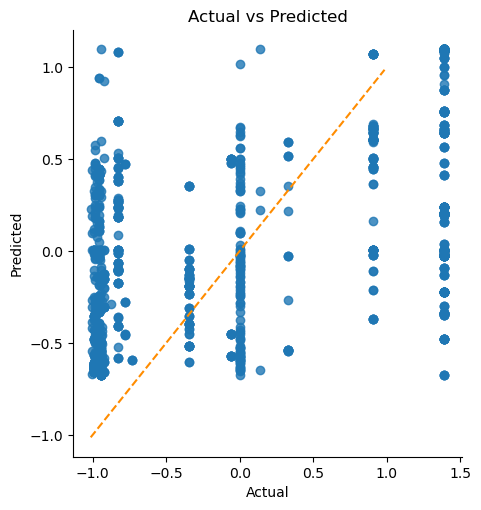

In [127]:
linear_assumption(f1_model,X_test1,y_test1)

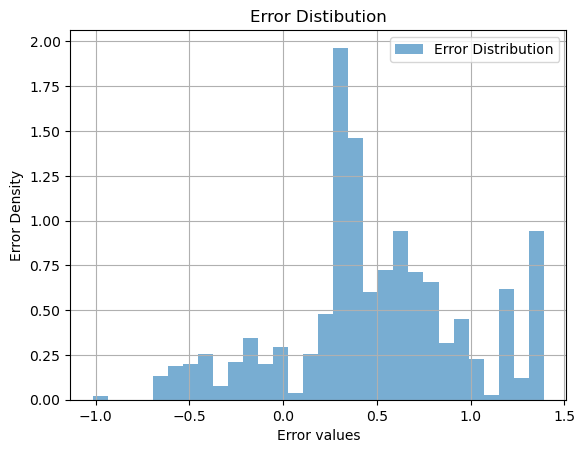

In [128]:
df_result = calculate_residuals(f1_model,X_test1,y_test1)
plt.hist(df_result.Residuals,30,label='Error Distribution',alpha=.6,density=True)
plt.title("Error Distibution")
plt.xlabel("Error values")
plt.ylabel("Error Density")
plt.legend()
plt.grid()
plt.show()


- The above plot shows that the errors are slightly normally distributed, but it is not properly distributed normally.

In [129]:
test_data

,Unnamed: 0,appearance_id,game_id,player_id,competition_id,yellow_cards,red_cards,goals,assists,minutes_played,...,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,game_lineups_id,type_y,number,player_name,team_captain,position_y
0,4197,3450613_315762,3450613,315762,NL1,0,0,0,0,58,...,177,3000000,3000000,2026-06-30,d05d080ea379575b2aad4aa5766e69ce,starting_lineup,14,Luca de la Torre,0,Right Midfield
1,4198,3450613_315762,3450613,315762,NL1,0,0,0,0,58,...,177,3000000,3000000,2026-06-30,99032084fd00ffbfee52c541a9f960ab,substitutes,14,Luca de la Torre,0,Central Midfield


In [130]:
t1 = test_data[['goals','assists','yellow_cards','height_in_cm','team_captain','foot','minutes_played','home_club_name','away_club_name','attendance','market_value_in_eur']]
t1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   goals                2 non-null      int64 
 1   assists              2 non-null      int64 
 2   yellow_cards         2 non-null      int64 
 3   height_in_cm         2 non-null      int64 
 4   team_captain         2 non-null      int64 
 5   foot                 2 non-null      object
 6   minutes_played       2 non-null      int64 
 7   home_club_name       2 non-null      object
 8   away_club_name       2 non-null      object
 9   attendance           2 non-null      int64 
 10  market_value_in_eur  2 non-null      int64 
dtypes: int64(8), object(3)
memory usage: 308.0+ bytes


In [131]:
# Feature Engeneering
cat_col = t1.select_dtypes(include='object')
for col in cat_col.columns:
    label_encoder = preprocessing.LabelEncoder()
    t1[col+'_enc'] = label_encoder.fit_transform(t1[col])

t1 = t1.drop(cat_col,axis=1)
test = t1[['attendance']]
test

,attendance
0,3908
1,3908


In [132]:
predict = f1_model.predict(test)
predict

array([2010.89421568, 2010.89421568])

### Interpretation:
- MSE (Mean Squared Error) = 0.7245: This represents the average squared difference between the actual values and the values predicted by the model. Lower values indicate better model fit.

- MAE (Mean Absolute Error) = 0.7176: This measures the average absolute difference between the actual and predicted values. It provides a more direct measure of the average prediction error.

- RMSE (Root Mean Squared Error) = 0.8574: This is the square root of the MSE. It's useful because it's in the same units as the target variable, making it easier to interpret the magnitude of the errors.

- R-squared : This indicates that approximately 72.45% of the variance in the target variable can be explained by the model. A higher R-squared generally suggests a better fit.
### Overall Interpretation:
- The model with single feature (attendance) has a better performance than the  multiple features (foot_enc,away_club_name_enc,height_in_cm).So by concluding that the single feature (attendance) along is sufficient to predict the palyer's attendance.
- The model appears to have a moderate fit to the data. While the R-squared suggests that the model explains a decent portion of the variance, the MSE, MAE, and RMSE values indicate that there's still room for improvement in terms of prediction accuracy.

###  Focus Area 3 : Team Comparison
### Descriptive Analysis

In [133]:
Football_df.columns

Index(['appearance_id', 'game_id', 'player_id', 'date', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'game_event_id', 'minute', 'type_x',
       'description', 'player_in_id', 'player_assist_id', 'game_lineups_id',
       'type_y', 'number', 'team_captain', 'position', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'date_of_birth',
       'sub_position', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'Cards'],
      dtype='object')

In [134]:
team_stat = Football_df.groupby('home_club_name').agg({
            'goals':'sum','assists':'sum','yellow_cards':'sum','red_cards':'sum','minutes_played':'sum', })
team_stat = team_stat.sort_values(ascending=False,by='goals').head(5)
team_stat

,goals,assists,yellow_cards,red_cards,minutes_played
home_club_name,,,,,
Borussia Dortmund,420,157,83,0,47806
Hobro IK,132,16,92,0,18553
Burnley Football Club,126,0,0,0,3839
verein fur leibesubungen,94,30,28,0,10195
Football Club Nords,87,38,23,0,14091


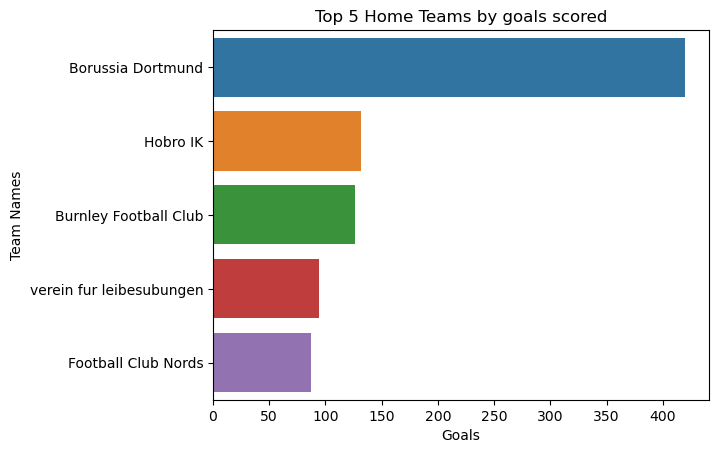

In [135]:
# Top 5 home club team's total goals
sns.barplot(x='goals',y=team_stat.index,data=team_stat)
plt.title("Top 5 Home Teams by goals scored")
plt.xlabel("Goals")
plt.ylabel('Team Names')
plt.show()

### Interpretation:
- The top Home club teams performance has been plotted here.
- The team 'Borussia' attains more number of goals than other Home teams.

In [136]:
team_stat1 = Football_df.groupby('away_club_name').agg({
            'goals':'sum','assists':'sum','yellow_cards':'sum','red_cards':'sum','minutes_played':'sum'})
team_stat1 = team_stat1.sort_values(ascending=False,by='goals').head(5)
team_stat1

,goals,assists,yellow_cards,red_cards,minutes_played
away_club_name,,,,,
Chelsea Football Club,240,43,5,0,16587
Borussia Dortmund,210,86,76,0,33942
Fodbold Club Nords Aalnd,86,28,16,0,10667
FC Schalke 04,80,15,77,1,15378
Naomes Olympique,72,36,0,0,2448


Top 5 Teams by goals scored


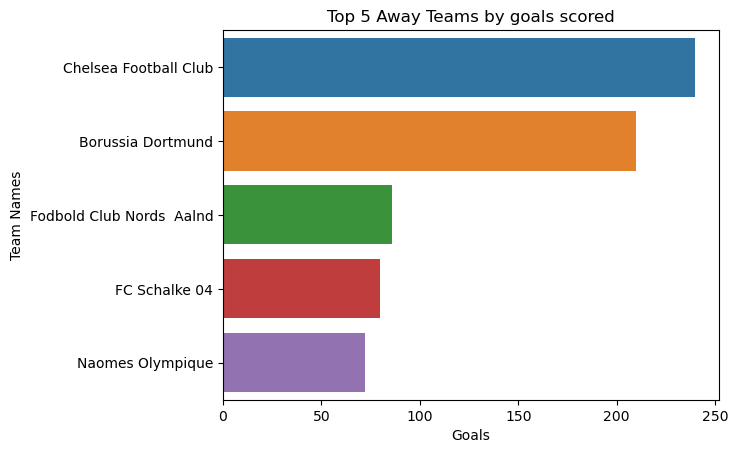

In [137]:
# Top 5 away club team's total goals
print("Top 5 Teams by goals scored")
sns.barplot(x='goals',y=team_stat1.index,data=team_stat1)
plt.title("Top 5 Away Teams by goals scored")
plt.xlabel("Goals")
plt.ylabel('Team Names')
plt.show()

### Interpretation:
- 'Chelsea Football club' the Away club team lead in the performance by optaining more number of goals.

In [138]:
home_goals = Football_df.groupby('home_club_name')['home_club_goals'].sum() 
away_goals = Football_df.groupby('away_club_name')['away_club_goals'].sum() 
team_goal_diff = home_goals.align(home_goals)[0] - away_goals.align(away_goals)[1]

In [139]:
print(" Team Goals Difference  ")
team_goal_diff.sort_values(ascending=False).head(5)

 Team Goals Difference  


Borussia Dortmund                       596.0
Hobro IK                                170.0
Liverpool Football Club                 169.0
Stade Rennais Football Club             168.0
Koninklijke Atletiek Associatie Gent    104.0
dtype: float64

### Hypothesis Testing
Check wheather there is significant difference in the average number of goals scored per game by away club team between Borussia Dortmund and Chelsea Football Club.Select 27 random samples and use 5% level of significance

Null Hypothesis (H0): There is no significant difference in the average number of goals scored per game by away club team between Borussia Dortmund and Chelsea Football Club.
Alternative Hypothesis (H1): There is significant difference in the average number of goals scored per game by away club team between Borussia Dortmund and Chelsea Football Club.

In [140]:
sample_d = Football_df.sample(frac=.3,random_state=0)
sample_d

,appearance_id,game_id,player_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,...,country_of_birth,date_of_birth,sub_position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,Cards
1501,3047707_355369,3047707,355369,2018-12-22,Jordan,FR1,0,0,2,1,...,United States,1996-04-26,Centre-Forward,right,191.0,7000000.0,10000000,2024-06-30,Gestifute,0
3626,3087324_542776,3087324,542776,2018-08-16,Jonathan Amon,ELQ,0,0,1,0,...,United States,1999-04-30,Left Winger,right,175.0,300000.0,700000,2024-06-30,Wasserman,0
3043,3203477_332697,3203477,332697,2019-09-20,Weston McKennie,L1,1,0,0,0,...,United States,1998-08-28,Central Midfield,right,185.0,20000000.0,25000000,2025-06-30,Wasserman,1
3431,3210318_381187,3210318,381187,2019-08-23,Emmanuel Sabbi,DK1,1,0,0,0,...,Italy,1997-12-24,Right Winger,right,178.0,800000.0,1000000,2027-06-30,Avid Sports Group,1
998,2864733_124732,2864733,124732,2017-08-13,John Anthony Brooks,DFB,0,0,0,0,...,Germany,1993-01-28,Centre-Back,left,194.0,2000000.0,15000000,2024-06-30,ROGON,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,2586770_355369,2586770,355369,2015-08-09,Jordan,FR1,0,0,1,0,...,United States,1996-04-26,Centre-Forward,right,191.0,7000000.0,10000000,2024-06-30,Gestifute,0
1525,3047707_355369,3047707,355369,2018-12-22,Jordan,FR1,0,0,2,1,...,United States,1996-04-26,Centre-Forward,right,191.0,7000000.0,10000000,2024-06-30,Gestifute,0
2308,3135803_315779,3135803,315779,2019-02-13,Christian Pulisic,CL,0,0,0,0,...,United States,1998-09-18,Right Winger,right,177.0,25000000.0,60000000,2027-06-30,Wasserman,0
1288,2732122_209019,2732122,209019,2016-11-27,Kenny Saief,BE1,0,0,1,0,...,United States,1993-12-17,Right Winger,left,176.0,700000.0,3500000,2024-06-30,Wasserman,0


In [141]:
T1 = sample_d[sample_d['away_club_name']=='Borussia Dortmund']
Team1=T1.head(27)
Team1

,appearance_id,game_id,player_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,...,country_of_birth,date_of_birth,sub_position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,Cards
2010,2871504_315779,2871504,315779,2018-01-19,Christian Pulisic,L1,1,0,0,0,...,United States,1998-09-18,Right Winger,right,177.0,2.500000e+07,60000000,2027-06-30 00:00:00.000,Wasserman,1
1736,2704243_315779,2704243,315779,2016-09-20,Christian Pulisic,L1,0,0,0,0,...,United States,1998-09-18,Right Winger,right,177.0,2.500000e+07,60000000,2027-06-30 00:00:00.000,Wasserman,0
214,2240551_39378,2240551,39378,2012-09-27,Jozy Altidore,NLP,0,0,1,0,...,United States,1989-11-06,Centre-Forward,right,185.0,5.000000e+05,9000000,2024-12-31 00:00:00.000,Wasserman,0
1759,2704283_315779,2704283,315779,2016-10-22,Christian Pulisic,L1,0,0,1,1,...,United States,1998-09-18,Right Winger,right,177.0,2.500000e+07,60000000,2027-06-30 00:00:00.000,Wasserman,0
2829,2704512_103064,2704512,103064,2017-02-11,Terrence Boyd,L1,0,0,1,0,...,Germany,1991-02-16,Centre-Forward,right,188.0,7.500000e+05,1750000,2024-06-30 00:00:00.000,TrueSports GmbH,0
2301,3135803_315779,3135803,315779,2019-02-13,Christian Pulisic,CL,0,0,0,0,...,United States,1998-09-18,Right Winger,right,177.0,2.500000e+07,60000000,2027-06-30 00:00:00.000,Wasserman,0
1669,2581951_315779,2581951,315779,2016-04-10,Christian Pulisic,L1,0,0,0,0,...,United States,1998-09-18,Right Winger,right,177.0,2.500000e+07,60000000,2027-06-30 00:00:00.000,Wasserman,0
2223,3058443_315779,3058443,315779,2018-09-22,Christian Pulisic,L1,0,0,1,0,...,United States,1998-09-18,Right Winger,right,177.0,2.500000e+07,60000000,2027-06-30 00:00:00.000,Wasserman,0
4245,3203722_504215,3203722,504215,2020-06-20,Giovanni Reyna,L1,1,0,0,1,...,England,2002-11-13,Attacking Midfield,right,185.0,2.500000e+07,42000000,2025-06-30 00:00:00.000,Wasserman,1
1696,2581973_315779,2581973,315779,2016-04-23,Christian Pulisic,L1,1,0,1,0,...,United States,1998-09-18,Right Winger,right,177.0,2.500000e+07,60000000,2027-06-30 00:00:00.000,Wasserman,1


In [142]:
T2 = sample_d[sample_d['away_club_name']=='Chelsea Football Club']
Team2=T2.head(27)
Team2

,appearance_id,game_id,player_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,...,country_of_birth,date_of_birth,sub_position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,Cards
2472,3219361_315779,3219361,315779,2019-11-02,Christian Pulisic,GB1,0,0,1,0,...,United States,1998-09-18,Right Winger,right,177.0,2.500000e+07,60000000,2027-06-30 00:00:00.000,Wasserman,0
2664,3219107_315779,3219107,315779,2020-07-11,Christian Pulisic,GB1,0,0,0,0,...,United States,1998-09-18,Right Winger,right,177.0,2.500000e+07,60000000,2027-06-30 00:00:00.000,Wasserman,0
2713,3401687_315779,3401687,315779,2020-08-01,Christian Pulisic,FAC,0,0,1,0,...,United States,1998-09-18,Right Winger,right,177.0,2.500000e+07,60000000,2027-06-30 00:00:00.000,Wasserman,0
2718,3401687_315779,3401687,315779,2020-08-01,Christian Pulisic,FAC,0,0,1,0,...,United States,1998-09-18,Right Winger,right,177.0,2.500000e+07,60000000,2027-06-30 00:00:00.000,Wasserman,0
2434,3219381_315779,3219381,315779,2019-10-26,Christian Pulisic,GB1,0,0,3,0,...,United States,1998-09-18,Right Winger,right,177.0,2.500000e+07,60000000,2027-06-30 00:00:00.000,Wasserman,0
2522,3252232_315779,3252232,315779,2019-11-27,Christian Pulisic,CL,0,0,1,0,...,United States,1998-09-18,Right Winger,right,177.0,2.500000e+07,60000000,2027-06-30 00:00:00.000,Wasserman,0
2644,3219115_315779,3219115,315779,2020-07-07,Christian Pulisic,GB1,0,0,1,0,...,United States,1998-09-18,Right Winger,right,177.0,2.500000e+07,60000000,2027-06-30 00:00:00.000,Wasserman,0
2630,3388676_315779,3388676,315779,2020-06-28,Christian Pulisic,FAC,0,0,0,0,...,United States,1998-09-18,Right Winger,right,177.0,2.500000e+07,60000000,2027-06-30 00:00:00.000,Wasserman,0
2570,3219276_315779,3219276,315779,2020-01-01,Christian Pulisic,GB1,0,0,0,0,...,United States,1998-09-18,Right Winger,right,177.0,2.500000e+07,60000000,2027-06-30 00:00:00.000,Wasserman,0
2432,3219381_315779,3219381,315779,2019-10-26,Christian Pulisic,GB1,0,0,3,0,...,United States,1998-09-18,Right Winger,right,177.0,2.500000e+07,60000000,2027-06-30 00:00:00.000,Wasserman,0


In [143]:
Goall_A = Team1['goals'].tolist()
Goal_B = Team2['goals'].tolist()

In [144]:
x1 = st.mean(Goall_A)
x2 = st.mean(Goal_B)
v1 = st.stdev(Goall_A)**2
v2 = st.stdev(Goal_B)**2
n1 = len(Goall_A)
n2 = len(Goal_B)
df = n1+n2-2
alpha = .05

print("Average goal by Team-A:",x1)
print("Average goal by Team-B:",x2)
print("Goal variance by Team-A:",v1)
print("Goal variance by Team-B:",v2)
print("Sample Size of Team-A:",n1)
print("Sample Size of Team-B:",n1)
print("Degree of freedom:",df)

Average goal by Team-A: 0.48148148148148145
Average goal by Team-B: 1.0740740740740742
Goal variance by Team-A: 0.2592592592592593
Goal variance by Team-B: 1.0712250712250713
Sample Size of Team-A: 27
Sample Size of Team-B: 27
Degree of freedom: 52


In [145]:
signal = abs(x1-x2)
noise = sqrt(v1*(n1-1)+v2*(n2-1))*sqrt(1/n1+1/n2)

In [146]:
t_statistics = signal/noise
print(f"T-Statistics : {t_statistics:.4f}")

p_value = t.sf(abs(t_statistics),df)*2
print(f"P-Value : {p_value:.4f}")

t_critical = t.ppf(1-alpha/2,df)
print(f"T-Critical : {t_critical:.4f}")

T-Statistics : 0.3702
P-Value : 0.7127
T-Critical : 2.0066


# Interpretation
- The P-Value = 0.71 > Alpha = 0.05
- T-Statistics = 0.37 < T-Critical = 2.0
- From the above analysis it show that here we are Accepting the Null hypothesis.
- There is no significant difference in the average number of goals scored per game by away club team between Borussia Dortmund and Chelsea Football Club.

###  Focus Area 4 : Attendance and Stadium Analysis

In [147]:
Football_df.columns

Index(['appearance_id', 'game_id', 'player_id', 'date', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'game_event_id', 'minute', 'type_x',
       'description', 'player_in_id', 'player_assist_id', 'game_lineups_id',
       'type_y', 'number', 'team_captain', 'position', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'date_of_birth',
       'sub_position', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'Cards'],
      dtype='object')

### Descriptive Analysis

In [148]:
statistical_analysis(Football_df,'attendance')

{'mean': 31301.74099826173,
 'median': 30000.0,
 'std_dev': 23547.18521472966,
 'variance': 554469931.5367831,
 'skewness': 0.5823132984941208,
 'kurtosis': -0.5796721233754116}

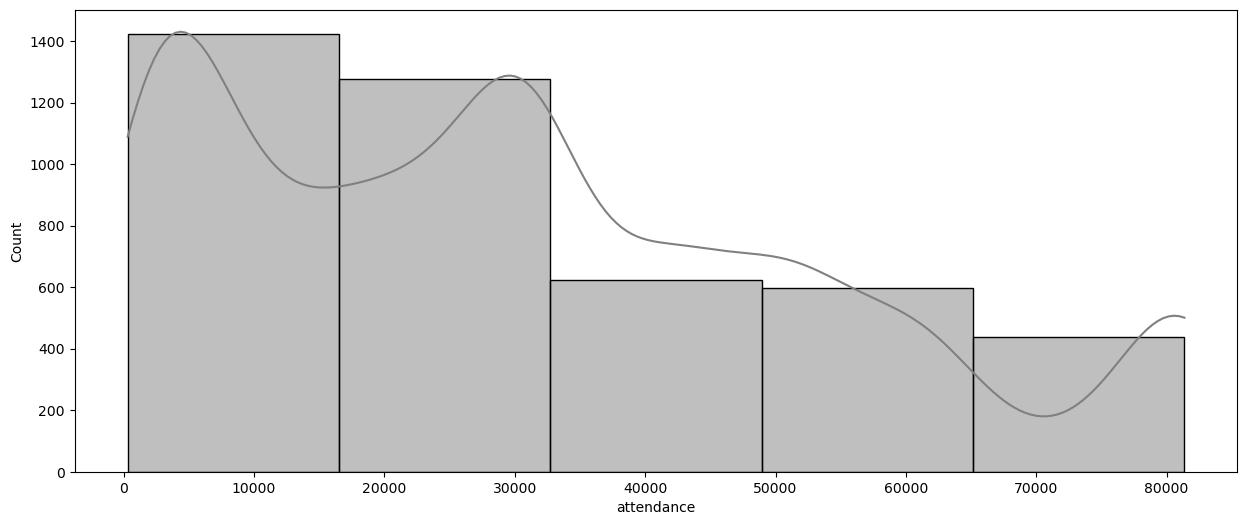

In [149]:
# Visualizing the  Attendance Distribution
plt.figure(figsize=(15,6))
sns.histplot(Football_df['attendance'],bins=5,kde=True,color='gray')
plt.show()

### Interpretation:
- The players attendance has been distributed and it has been distributed towards right.
- The maximum number of player's attendance falls under the range of 0-1500.

stadium
SIGNAL IDUNA PARK          417
DS Arena                   231
Veltins-Arena              205
Right to Dream Park        198
Olympiastadion Berlin      171
Stamford Bridge            147
Volkswagen Arena           125
Max-Morlock-Stadion         99
Roazhon Park                96
Wohninvest-Weserstadion     93
Name: count, dtype: int64


Text(0.5, 0, 'Number of matches')

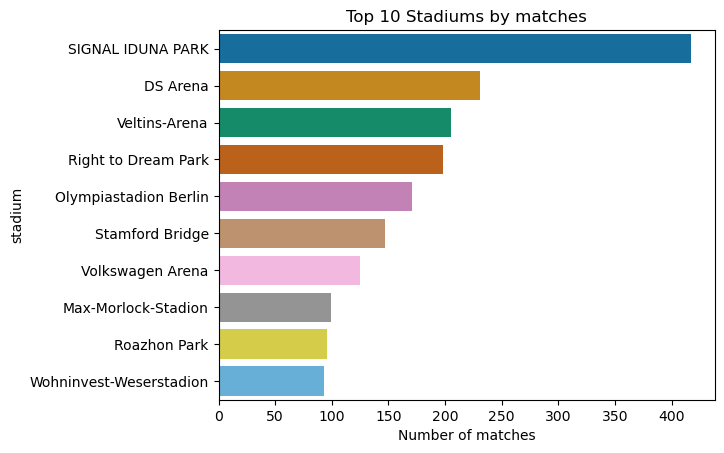

In [150]:
# Visualizing the Top Stadiums by Attendance
top_stadium = Football_df['stadium'].value_counts().head(10)
print(top_stadium)
sns.barplot(x=top_stadium.values,y=top_stadium.index,palette='colorblind')
plt.title("Top 10 Stadiums by matches")
plt.xlabel('Number of matches')

### Interpretation:
- The top stadium which has contacted more matches has been calculated.
- The stadium 'SIGNAL IDUNA PARK' has more number of matches.

### KNN Model

### Objective Question
For a KNN model predicting football match attendance based on factors like season,yellow_cards,minutes played,aggregate, and competition type how sensitive is the model's performance to the choice of the 'K' parameter, and how does this sensitivity impact the model's ability to generalize to new, unseen matches?

In [151]:
Football_df['competition_type'].unique()

array(['domestic_league', 'domestic_cup', 'international_cup', 'other'],
      dtype=object)

In [152]:
knn_df=Football_df.copy()
knn_df.loc[knn_df['attendance']<19000,'attendance']=0
knn_df.loc[(knn_df['attendance']>=19000)&(knn_df['attendance']<45000),'attendance']=1
knn_df.loc[knn_df['attendance']>=45000,'attendance']=2
  

In [153]:
encode = LabelEncoder()
knn_df['aggregate_enc'] = encode.fit_transform(knn_df['aggregate'])
knn_df['competition_type_enc'] = encode.fit_transform(knn_df['competition_type'])


In [154]:
tv = knn_df['attendance']

In [155]:
knn_data = knn_df[['goals','season','yellow_cards','minutes_played','aggregate_enc','competition_type_enc']]
knn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4360 entries, 0 to 4359
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   goals                 4360 non-null   int64
 1   season                4360 non-null   int64
 2   yellow_cards          4360 non-null   int64
 3   minutes_played        4360 non-null   int64
 4   aggregate_enc         4360 non-null   int32
 5   competition_type_enc  4360 non-null   int32
dtypes: int32(2), int64(4)
memory usage: 170.4 KB


In [156]:
col=knn_data.columns
Scaler = StandardScaler()
Knn_scaled = Scaler.fit_transform(knn_data)
Knn_scaled = pd.DataFrame(Knn_scaled,columns=col)
Knn_scaled

,goals,season,yellow_cards,minutes_played,aggregate_enc,competition_type_enc
0,0.806365,-2.126063,-0.456656,0.917303,2.416096,-0.005368
1,-0.758277,-2.126063,2.135820,0.917303,-0.681138,-0.005368
2,-0.758277,-2.126063,-0.456656,0.674824,-1.261870,-0.005368
3,-0.758277,-2.126063,2.135820,0.917303,-1.358658,-0.005368
4,0.806365,-2.126063,-0.456656,0.917303,-0.584350,-0.005368
...,...,...,...,...,...,...
4355,-0.758277,1.399518,-0.456656,-0.634560,1.157844,-0.005368
4356,-0.758277,1.399518,-0.456656,-0.634560,1.157844,-0.005368
4357,-0.758277,1.399518,-0.456656,-0.634560,1.157844,-0.005368
4358,-0.758277,1.399518,-0.456656,-0.634560,1.157844,-0.005368


In [157]:
Knn_scaled = pd.concat([Knn_scaled,tv],axis=1)
Knn_scaled

,goals,season,yellow_cards,minutes_played,aggregate_enc,competition_type_enc,attendance
0,0.806365,-2.126063,-0.456656,0.917303,2.416096,-0.005368,0.0
1,-0.758277,-2.126063,2.135820,0.917303,-0.681138,-0.005368,0.0
2,-0.758277,-2.126063,-0.456656,0.674824,-1.261870,-0.005368,0.0
3,-0.758277,-2.126063,2.135820,0.917303,-1.358658,-0.005368,0.0
4,0.806365,-2.126063,-0.456656,0.917303,-0.584350,-0.005368,0.0
...,...,...,...,...,...,...,...
4355,-0.758277,1.399518,-0.456656,-0.634560,1.157844,-0.005368,0.0
4356,-0.758277,1.399518,-0.456656,-0.634560,1.157844,-0.005368,0.0
4357,-0.758277,1.399518,-0.456656,-0.634560,1.157844,-0.005368,0.0
4358,-0.758277,1.399518,-0.456656,-0.634560,1.157844,-0.005368,0.0


In [158]:
X_knn = np.array(Knn_scaled.iloc[:,:-1])
y_knn = Knn_scaled['attendance']

In [159]:
X_train,X_test,y_train,y_test = train_test_split(X_knn,y_knn,train_size=.8,shuffle=True,random_state=2)

### Finding the optimum k-value using elbow method

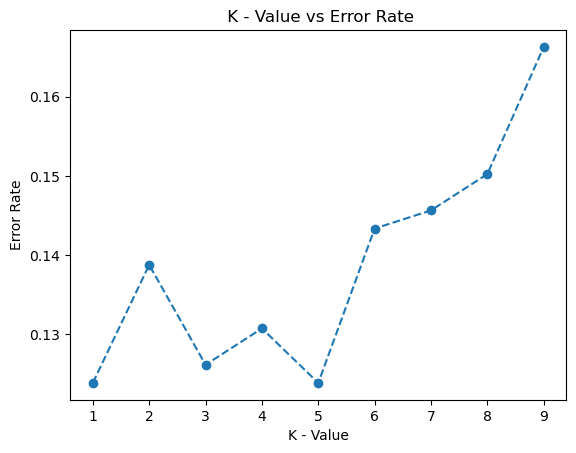

In [160]:
error_rate=[]
for i in range(1,10):
    atten = neighbors.KNeighborsClassifier(n_neighbors=i)
    atten.fit(X_train,y_train)
    y_predict_k = atten.predict(X_test)
    error_rate.append(np.mean(y_predict_k != y_test))
plt.plot(range(1,10),error_rate,linestyle='--',marker='o')
plt.title(" K - Value vs Error Rate")
plt.xlabel("K - Value")
plt.ylabel("Error Rate")
plt.show()

- The optimum K-value has been fixed under the least error rate.
- At K=5 it attains least error rate

In [161]:
error_rate

[0.12385321100917432,
 0.13876146788990826,
 0.12614678899082568,
 0.13073394495412843,
 0.12385321100917432,
 0.143348623853211,
 0.14564220183486237,
 0.15022935779816513,
 0.16628440366972477]

In [162]:
k = 5
attend_clf = neighbors.KNeighborsClassifier(k)
attend_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [163]:
print(attend_clf.classes_)
print(attend_clf.n_neighbors)

[0. 1. 2.]
5


In [164]:
test_data['attendance']

0    3908
1    3908
Name: attendance, dtype: int64

In [165]:
encode = LabelEncoder()
test_data['aggregate_enc'] = encode.fit_transform(test_data['aggregate'])
test_data['competition_type_enc'] = encode.fit_transform(test_data['competition_type'])


In [166]:
test_knn = test_data[['goals','season','yellow_cards','minutes_played','aggregate_enc','competition_type_enc']]

In [167]:
predict_knn = attend_clf.predict(test_knn)
predict_knn

array([1., 1.])

In [168]:
# Model Evaluation
print("Recall Score :",recall_score(y_test,y_predict_k,average='macro'))
print("F1-Score :",f1_score(y_test,y_predict_k,average='macro'))
print("Precision Score :",precision_score(y_test,y_predict_k,average='macro'))
print("Accuracy Score :",accuracy_score(y_test,y_predict_k))

Recall Score : 0.836311996537832
F1-Score : 0.8350850225902254
Precision Score : 0.8340546159888982
Accuracy Score : 0.8337155963302753


### Interpretation
- High Recall (0.8362): This indicates that the model has a good ability to identify most of the actual positive cases. In other words, it has a low rate of false negatives.

- High Precision (0.8350): This suggests that when the model predicts a positive case, it is generally correct. It has a low rate of false positives .

- High F1-Score (0.8340): This score balances precision and recall. A high F1-score indicates that the model has a good overall performance in identifying the positive class while maintaining a low rate of false positives and false negatives.

- High Accuracy (0.8337): This indicates that the model correctly predicts the class (whether it belongs to class 0 or 1) for 83.3% of the instances in the dataset.

### Overall Interpretation: 
- These scores suggest that the KNN model is performing very well. It demonstrates a strong ability to identify the positive class with high accuracy, precision, and recall.

###  Focus Area 5 : Referee Analysis

In [169]:
Football_df.columns

Index(['appearance_id', 'game_id', 'player_id', 'date', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'game_event_id', 'minute', 'type_x',
       'description', 'player_in_id', 'player_assist_id', 'game_lineups_id',
       'type_y', 'number', 'team_captain', 'position', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'date_of_birth',
       'sub_position', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'Cards'],
      dtype='object')

In [170]:
# Identify the top 10 most frequent referees
Top_referee = Football_df['referee'].value_counts(ascending=False).head(10)
Top_referee

referee
Felix Zwayer         208
Dr. Felix Brych      150
Daniel Siebert       146
Tobias Stieler       126
Manuel Graofe        124
Marco Fritz          108
Peter Kjaersgaard    103
Guido Winkmann        91
Sascha Stegemann      87
Anthony Taylor        85
Name: count, dtype: int64

In [171]:
referee_cards = Football_df.groupby('referee')[['yellow_cards','red_cards']].sum()
referee_cards['total_cards'] = referee_cards['yellow_cards'] + referee_cards['red_cards']
referee_cards['matches_referee'] = Football_df.groupby('referee').size()
referee_cards['Avg_cards_per_game'] = referee_cards['total_cards'] / referee_cards['matches_referee']

In [172]:
referee_cards.sort_values(ascending=False,by='Avg_cards_per_game')

,yellow_cards,red_cards,total_cards,matches_referee,Avg_cards_per_game
referee,,,,,
Marijo Strahonja,4,0,4,2,2.000000
Cuneyt Cakır,5,0,5,3,1.666667
jose antonio teixeira vitienes,2,0,2,2,1.000000
Olegario Benquerenasa,3,0,3,3,1.000000
Halis A zkahya,1,0,1,1,1.000000
...,...,...,...,...,...
Chris Kavanagh,0,0,0,16,0.000000
Carlos del Cerro Grande,0,0,0,12,0.000000
Cagatay Sahan,0,0,0,1,0.000000


Text(0.5, 1.0, 'Total cards by Refree')

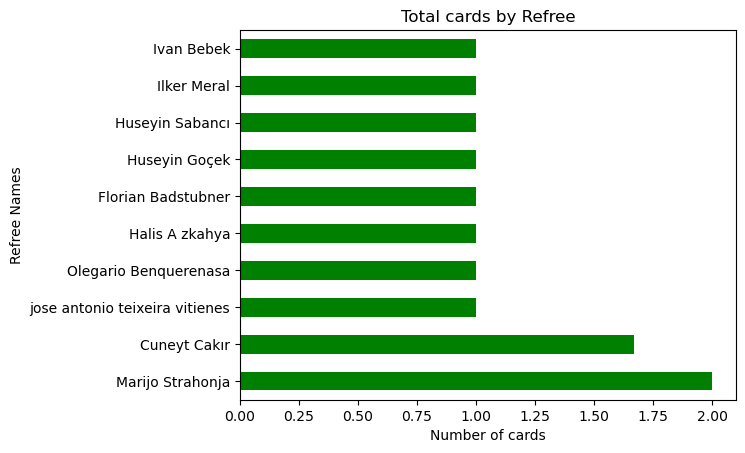

In [173]:
# average cards per game for top 10 referees

top10_refree_cards = referee_cards['Avg_cards_per_game'].sort_values(ascending=False).head(10)
top10_refree_cards.plot(kind='barh',color='green')
plt.xlabel("Number of cards")
plt.ylabel("Refree Names")
plt.title("Total cards by Refree")

### Interpretation:
- The refree 'Marijo Strahonja' who has given more number of cards than other refrees.

###  Focus Area 6 : Substitution Patterns

In [174]:
top_substitutes = Football_df[['name','player_in_id']].value_counts().head(5)
top_substitutes

name                 player_in_id 
Christian Pulisic    208989.698377    420
John Anthony Brooks  208989.698377    195
Emmanuel Sabbi       208989.698377    143
Timothy Chandler     208989.698377    132
Christian Pulisic    392768.000000     98
Name: count, dtype: int64

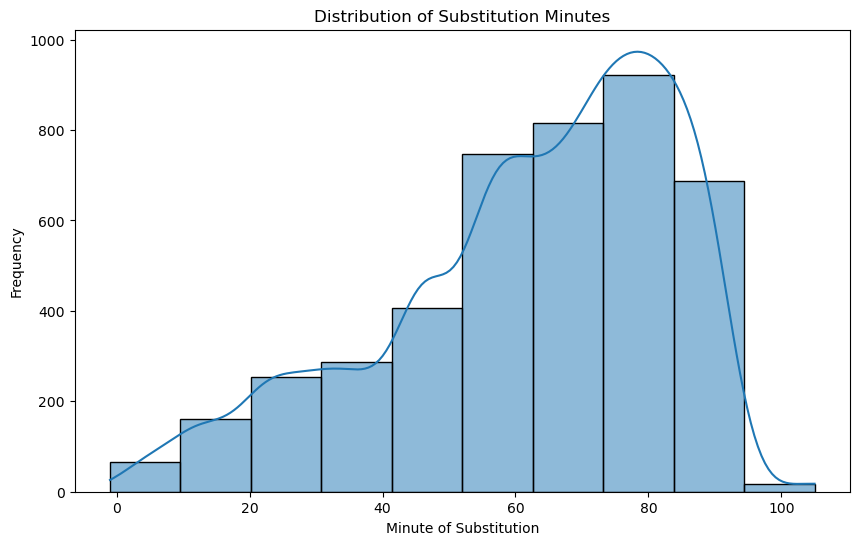

In [175]:
### substitutions minute frequency
plt.figure(figsize=(10, 6))
sns.histplot(Football_df['minute'], bins=10,kde=True)
plt.title("Distribution of Substitution Minutes")
plt.xlabel("Minute of Substitution")
plt.ylabel("Frequency")
plt.show()

### Interpretation:
- The histogram shows a clear right-skewed distribution
- The highest frequency of substitutions occurs between the 70th and 80th minutes. This suggests a common strategy of making substitutions in the later stages of the game
- The frequency of substitutions is relatively low in the early minutes of the game

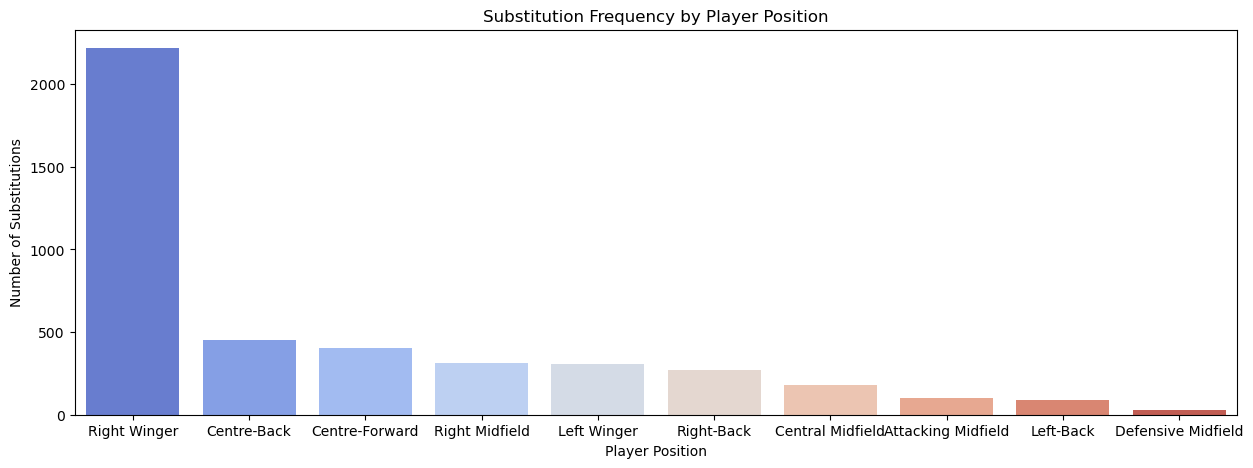

In [176]:
# Visualize substitution frequency by player position
position_substitutions = Football_df.groupby('position')['player_in_id'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(y=position_substitutions.values,x=position_substitutions.index,palette='coolwarm')
plt.gcf().set_size_inches(15,5)
plt.title("Substitution Frequency by Player Position")
plt.xlabel("Player Position")
plt.ylabel("Number of Substitutions")
plt.show()

### Interpretation:
- The frequent substitution happens in the 'Right Winger' position
- This suggest that a strategy make to perform a goals.

###  Focus Area 7 : Event Analysis

type_x
Substitutions    2660
Goals            1464
Cards             236
Name: count, dtype: int64


<Axes: xlabel='type_x'>

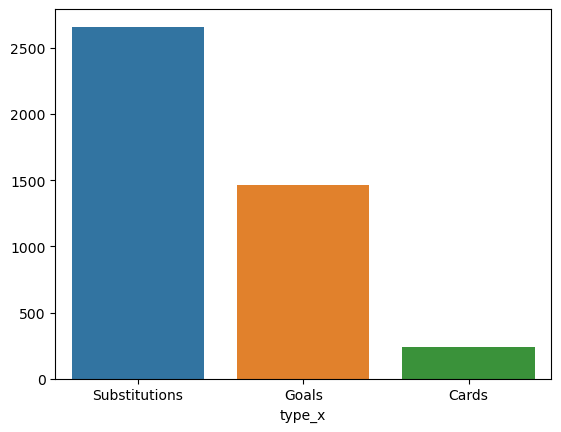

In [177]:
# Visualize the most frequent game events
event_type = Football_df['type_x'].value_counts()
print(event_type)
sns.barplot(x=event_type.index,y=event_type.values)

### Interpretation:
-  The "Substitutions" category has the highest count, significantly exceeding the counts for "Goals" and "Cards".

In [178]:
sample_d.columns

Index(['appearance_id', 'game_id', 'player_id', 'date', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'game_event_id', 'minute', 'type_x',
       'description', 'player_in_id', 'player_assist_id', 'game_lineups_id',
       'type_y', 'number', 'team_captain', 'position', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'date_of_birth',
       'sub_position', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'Cards'],
      dtype='object')

### Hypothesis Testing
Perform analysis for the average minute of the game event occured for the different game type and check wheather there is a significance difference in the average minute of the event types. Select 25 random samples and use 5% level of significance.

Null Hypothesis (H0): There is no significant difference in the average minute at which different types of game events occur.
Alternative Hypothesis (H1): The average minute at which different types of game events occur is significantly different.

In [179]:
sample_d['type_x'].unique()

array(['Goals', 'Substitutions', 'Cards'], dtype=object)

In [180]:
T1 = sample_d[sample_d['type_x']=='Goals']
Type1 = T1.head(25)
Type1

,appearance_id,game_id,player_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,...,country_of_birth,date_of_birth,sub_position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,Cards
1501,3047707_355369,3047707,355369,2018-12-22,Jordan,FR1,0,0,2,1,...,United States,1996-04-26,Centre-Forward,right,191.0,7000000.0,10000000,2024-06-30 00:00:00.000,Gestifute,0
3626,3087324_542776,3087324,542776,2018-08-16,Jonathan Amon,ELQ,0,0,1,0,...,United States,1999-04-30,Left Winger,right,175.0,300000.0,700000,2024-06-30 00:00:00.000,Wasserman,0
1813,2704551_315779,2704551,315779,2017-03-04,Christian Pulisic,L1,0,0,1,1,...,United States,1998-09-18,Right Winger,right,177.0,25000000.0,60000000,2027-06-30 00:00:00.000,Wasserman,0
3478,3210376_381187,3210376,381187,2019-11-03,Emmanuel Sabbi,DK1,1,0,1,0,...,Italy,1997-12-24,Right Winger,right,178.0,800000.0,1000000,2027-06-30 00:00:00.000,Avid Sports Group,1
3558,2875203_542776,2875203,542776,2017-11-26,Jonathan Amon,DK1,0,0,1,0,...,United States,1999-04-30,Left Winger,right,175.0,300000.0,700000,2024-06-30 00:00:00.000,Wasserman,0
562,2321213_49723,2321213,49723,2014-01-25,Timothy Chandler,L1,1,0,1,0,...,Germany,1990-03-29,Right-Back,right,186.0,700000.0,5000000,2025-06-30 00:00:00.000,Wasserman,1
1505,3047707_355369,3047707,355369,2018-12-22,Jordan,FR1,0,0,2,1,...,United States,1996-04-26,Centre-Forward,right,191.0,7000000.0,10000000,2024-06-30 00:00:00.000,Gestifute,0
2606,3219168_315779,3219168,315779,2020-06-25,Christian Pulisic,GB1,0,0,1,0,...,United States,1998-09-18,Right Winger,right,177.0,25000000.0,60000000,2027-06-30 00:00:00.000,Wasserman,0
3111,3203656_332697,3203656,332697,2020-03-07,Weston McKennie,L1,0,0,1,0,...,United States,1998-08-28,Central Midfield,right,185.0,20000000.0,25000000,2025-06-30 00:00:00.000,Wasserman,0
2315,3058641_315779,3058641,315779,2019-03-09,Christian Pulisic,L1,0,0,1,1,...,United States,1998-09-18,Right Winger,right,177.0,25000000.0,60000000,2027-06-30 00:00:00.000,Wasserman,0


In [181]:
T2 = sample_d[sample_d['type_x']=='Cards']
Type2 = T2.head(25)
Type2

,appearance_id,game_id,player_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,...,country_of_birth,date_of_birth,sub_position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,Cards
470,2231434_49723,2231434,49723,2012-10-06,Timothy Chandler,L1,1,0,0,0,...,Germany,1990-03-29,Right-Back,right,186.00000,7.000000e+05,5000000,2025-06-30 00:00:00.000,Wasserman,1
528,2320462_49723,2320462,49723,2013-08-04,Timothy Chandler,DFB,1,0,0,0,...,Germany,1990-03-29,Right-Back,right,186.00000,7.000000e+05,5000000,2025-06-30 00:00:00.000,Wasserman,1
582,2321347_49723,2321347,49723,2014-05-03,Timothy Chandler,L1,1,0,0,0,...,Germany,1990-03-29,Right-Back,right,186.00000,7.000000e+05,5000000,2025-06-30 00:00:00.000,Wasserman,1
302,2321154_1321,2321154,1321,2013-11-09,Jermaine Jones,L1,1,0,0,0,...,Germany,1981-11-03,Defensive Midfield,both,184.00000,1.058815e+07,8000000,2025-12-29 10:03:04.241,Wasserman,1
1119,2329449_140069,2329449,140069,2014-05-18,Babajide Ogunbiyi,DK1,1,0,0,0,...,United States,1986-11-30,Centre-Back,right,193.00000,1.058815e+07,300000,2025-12-29 10:03:04.241,Wasserman,1
308,2346269_1321,2346269,1321,2014-03-28,Jermaine Jones,TR1,1,0,0,0,...,Germany,1981-11-03,Defensive Midfield,both,184.00000,1.058815e+07,8000000,2025-12-29 10:03:04.241,Wasserman,1
541,2321111_49723,2321111,49723,2013-09-29,Timothy Chandler,L1,1,0,0,0,...,Germany,1990-03-29,Right-Back,right,186.00000,7.000000e+05,5000000,2025-06-30 00:00:00.000,Wasserman,1
154,2224625_39467,2224625,39467,2013-03-17,Clarence Goodson,DK1,1,0,0,0,...,United States,1982-05-17,Centre-Back,right,193.00000,1.058815e+07,1850000,2025-12-29 10:03:04.241,Wasserman,1
531,2321049_49723,2321049,49723,2013-08-18,Timothy Chandler,L1,1,0,0,0,...,Germany,1990-03-29,Right-Back,right,186.00000,7.000000e+05,5000000,2025-06-30 00:00:00.000,Wasserman,1
170,2231544_39897,2231544,39897,2013-02-10,Michael Parkhurst,L1,1,0,0,0,...,United States,1984-01-24,Centre-Back,right,181.87454,1.058815e+07,1000000,2025-12-29 10:03:04.241,Wasserman,1


In [182]:
T1_min = Type1['minute'].tolist()
T2_min = Type2['minute'].tolist()

In [183]:
x1 = st.mean(T1_min)
x2 = st.mean(T2_min)
v1 = st.stdev(T1_min)**2
v2 = st.stdev(T2_min)**2
n1 = len(T1_min)
n2 = len(T2_min)
df = n1+n2-2
alpha = .05

print("Average minute by Goals event type:",x1)
print("Average minute by Cards event type:",x2)
print("Minute variance by Goals event type:",v1)
print("Minute variance by Cards event type:",v2)
print("Sample Size of  Goals event type:",n1)
print("Sample Size of Cards event type:",n1)
print("Degree of freedom:",df)

Average minute by Goals event type: 48.52
Average minute by Cards event type: 57.76
Minute variance by Goals event type: 583.1766666666667
Minute variance by Cards event type: 587.6066666666667
Sample Size of  Goals event type: 25
Sample Size of Cards event type: 25
Degree of freedom: 48


In [184]:
signal = abs(x1-x2)
noise = sqrt(v1*(n1-1)+v2*(n2-1))*sqrt(1/n1+1/n2)

In [185]:
t_statistics = signal/noise
print(f"T-Statistic : {t_statistics:.2f}")

p_value = t.sf(abs(t_statistics),df)*2
print(f"P-Value : {p_value:.2f}")

t_critical = t.ppf(1-alpha/2,df)
print(f"T-Critical : {t_critical:.2f}")


T-Statistic : 0.19
P-Value : 0.85
T-Critical : 2.01


## Interpretation
- The P-Value = 0.85 > Alpha = 0.05
- T-Statistics = 0.19 < T-Critical = 2.0
- From the above analysis it show that here we are Accepting the Null hypothesis.
- There is no significant difference in the average minute at which different types of game events occur.

###  Focus Area 8 : Competition Analysis

In [186]:
Football_df.columns

Index(['appearance_id', 'game_id', 'player_id', 'date', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'game_event_id', 'minute', 'type_x',
       'description', 'player_in_id', 'player_assist_id', 'game_lineups_id',
       'type_y', 'number', 'team_captain', 'position', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'date_of_birth',
       'sub_position', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'Cards'],
      dtype='object')

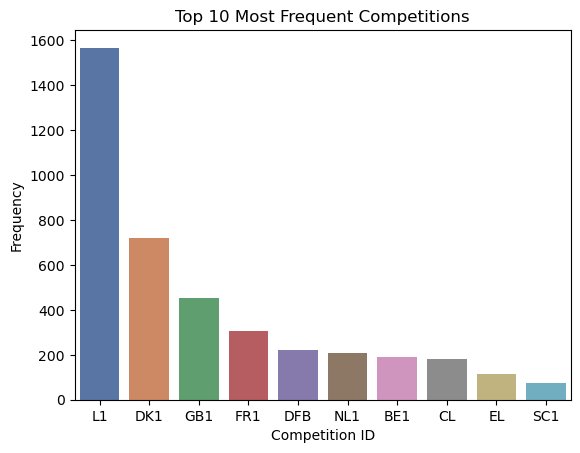

In [187]:
# Identify the most frequent competitions
frequent_competitions = Football_df['competition_id'].value_counts().head(10)
sns.barplot(x=frequent_competitions.index,y=frequent_competitions.values,palette='deep')
plt.title("Top 10 Most Frequent Competitions")
plt.xlabel("Competition ID")
plt.ylabel("Frequency")
plt.show()

### Interpretation:
- The top competion has been claculated above. The competition id 'L1' conducted more number of competion than other.
- The id 'DK1' has second highest.

Text(0, 0.5, 'Average Attendance')

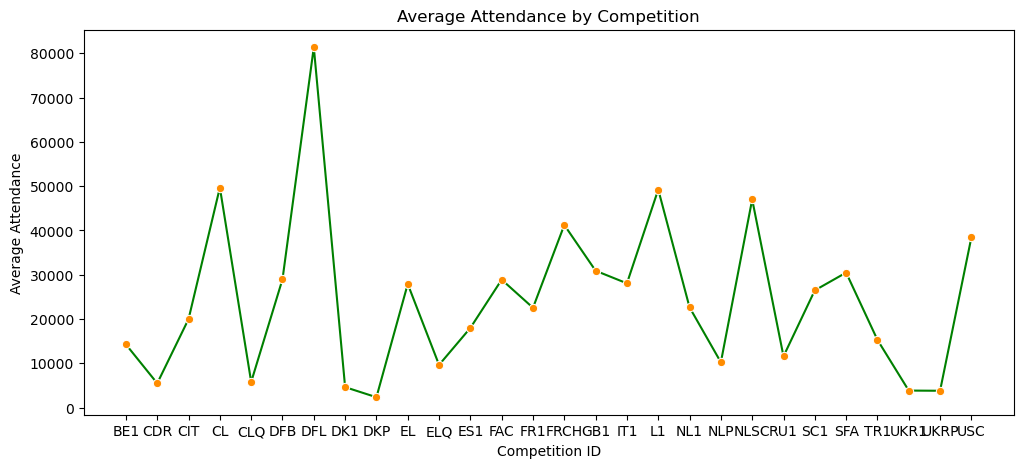

In [188]:
# Visualize average attendance for different competitions
competition_attendance = Football_df.groupby('competition_id')['attendance'].mean()
plt.figure(figsize=(12,5))
sns.lineplot(x=competition_attendance.index,y=competition_attendance.values,color='green',marker='o',markerfacecolor='darkorange')
plt.title("Average Attendance by Competition")
plt.xlabel("Competition ID")
plt.ylabel("Average Attendance")


### Interpretation:
- The average attendance has been calculated for the each competition ids.
- The competitionid 'DF1' has high in average attendance. 

###  Focus Area 9 : Player Attributes and Demographics

In [189]:
Football_df.columns

Index(['appearance_id', 'game_id', 'player_id', 'date', 'player_name',
       'competition_id', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_name', 'away_club_name',
       'aggregate', 'competition_type', 'game_event_id', 'minute', 'type_x',
       'description', 'player_in_id', 'player_assist_id', 'game_lineups_id',
       'type_y', 'number', 'team_captain', 'position', 'name', 'last_season',
       'current_club_id', 'player_code', 'country_of_birth', 'date_of_birth',
       'sub_position', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'Cards'],
      dtype='object')

In [190]:
# Player Attributes: Foot Preference
foot_count = Football_df['foot'].value_counts()

Text(0.5, 1.0, 'Player Foot Preference')

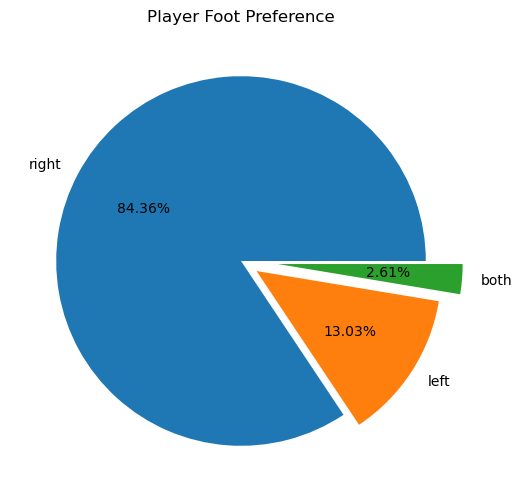

In [191]:
plt.figure(figsize=(6,6))
plt.pie(foot_count,labels = foot_count.index,explode=[0,0.1,0.2],autopct='%.2f%%')
plt.title("Player Foot Preference")

### Interpretation:
- The players foot preferance has been calculated.
- Most players prefer right foot.
- very less players has choosen left.

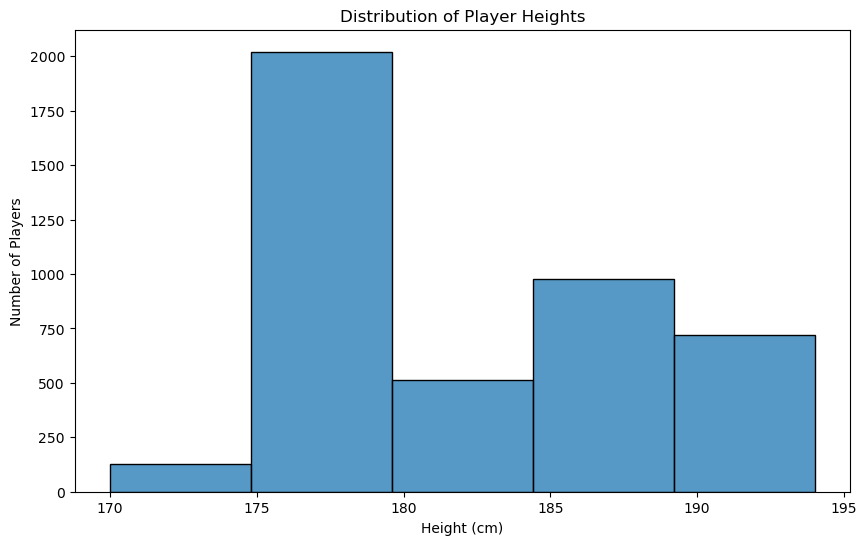

In [192]:
# Player Attributes: Height Distribution
plt.figure(figsize=(10, 6))
sns.histplot(Football_df['height_in_cm'], bins=5)
plt.title("Distribution of Player Heights")
plt.xlabel("Height (cm)")
plt.ylabel("Number of Players")
plt.show()

### Interpretation:
-  The most common height range is between 175 and 180 cm, with the tallest bar in that range.
- The second significant height range is between 185 and 190 cm, indicating a substantial number of players in this taller group.

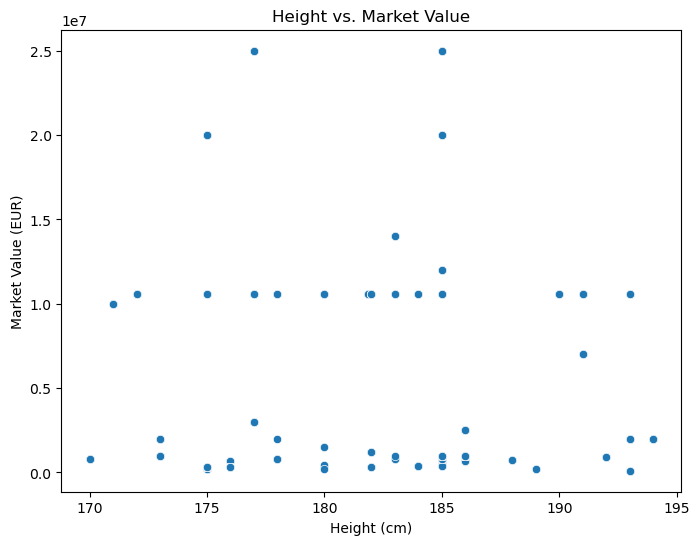

In [193]:
# Relationship between Player Attributes (Optional)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='height_in_cm', y='market_value_in_eur', data=Football_df)
plt.title("Height vs. Market Value")
plt.xlabel("Height (cm)")
plt.ylabel("Market Value (EUR)")
plt.show()

### Interpretation:
- There is no clear linear correlation between height and market value. 
- The data points are scattered widely across the plot, indicating that height alone does not strongly predict a player's market value.

### Performin KMeans clustering model for the Player Attributes and Demographics

### Objective Question:
For a K-Means clustering model used to group football players based on attributes like last season,foot,position, and other demographic factors like age and nationality, how sensitive is the model's clustering results to the initial choice of cluster, and what are the potential implications of this sensitivity for player scouting and team composition strategies?

In [194]:
Player_att_dem = Football_df[['last_season','position','foot','height_in_cm','country_of_birth','date_of_birth','market_value_in_eur','highest_market_value_in_eur']]

In [195]:
Player_att_dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4360 entries, 0 to 4359
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   last_season                  4360 non-null   int64         
 1   position                     4360 non-null   object        
 2   foot                         4360 non-null   object        
 3   height_in_cm                 4360 non-null   float64       
 4   country_of_birth             4360 non-null   object        
 5   date_of_birth                4360 non-null   datetime64[ns]
 6   market_value_in_eur          4360 non-null   float64       
 7   highest_market_value_in_eur  4360 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 272.6+ KB


In [196]:
Player_att_dem['date_of_birth_enc'] = Player_att_dem['date_of_birth'].astype(np.int64)//10**9

In [197]:
Player_att_dem['date_of_birth_enc'].unique()

array([ 593308800,  658195200,  390441600,  443750400,  495072000,
        626313600,  288230400,  373593600,  554688000,  463536000,
        595728000,  566179200,  605318400,  416016000,  638668800,
        520041600,  390096000,  489888000,  514166400,   43372800,
        728179200,  533692800,  546652800,  289526400,  715478400,
        722476800,  802396800,  756086400,  830476800,  642470400,
        742176000,  817689600,  906076800,  806112000,  701395200,
        699321600,  596678400,  819763200,  721785600,  829008000,
        666662400,  904262400,  882921600,  925430400,  743644800,
        846892800,  786153600,  951177600,  818121600,  843264000,
        560390400,  934502400,  951004800,  861840000,  918950400,
        973209600,  867888000,  949968000,  739497600, 1037145600,
        796521600,  841276800,  666489600,  895881600], dtype=int64)

In [198]:
Player_att_dem = Player_att_dem.drop('date_of_birth',axis=1)

In [199]:
cat = Player_att_dem.select_dtypes(include = 'object')
for i in cat.columns:
    encoder = LabelEncoder()
    Player_att_dem[i] = encoder.fit_transform(Player_att_dem[i])

In [200]:
Player_att_dem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4360 entries, 0 to 4359
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   last_season                  4360 non-null   int64  
 1   position                     4360 non-null   int32  
 2   foot                         4360 non-null   int32  
 3   height_in_cm                 4360 non-null   float64
 4   country_of_birth             4360 non-null   int32  
 5   market_value_in_eur          4360 non-null   float64
 6   highest_market_value_in_eur  4360 non-null   int64  
 7   date_of_birth_enc            4360 non-null   int64  
dtypes: float64(2), int32(3), int64(3)
memory usage: 221.5 KB


In [201]:
col = Player_att_dem.columns
scaler = StandardScaler()
Pl_demo_scaled = scaler.fit_transform(Player_att_dem)
Pl_demo_scaled = pd.DataFrame(Pl_demo_scaled,columns=col)
Pl_demo_scaled

,last_season,position,foot,height_in_cm,country_of_birth,market_value_in_eur,highest_market_value_in_eur,date_of_birth_enc
0,-2.028075,0.692435,0.406683,-0.790696,0.637816,0.000000,-0.901746,-1.501078
1,-2.028075,0.692435,0.406683,-0.790696,0.637816,0.000000,-0.901746,-1.501078
2,-2.028075,0.692435,0.406683,-0.790696,0.637816,0.000000,-0.901746,-1.501078
3,-2.028075,0.692435,0.406683,-0.790696,0.637816,0.000000,-0.901746,-1.501078
4,-2.028075,0.692435,0.406683,-0.790696,0.637816,0.000000,-0.901746,-1.501078
...,...,...,...,...,...,...,...,...
4355,0.482546,-0.811621,0.406683,-0.790696,0.637816,-0.732937,-0.806163,0.593913
4356,0.482546,-1.939662,0.406683,-0.790696,0.637816,-0.732937,-0.806163,0.593913
4357,0.482546,0.316421,0.406683,-0.790696,0.637816,-0.732937,-0.806163,0.593913
4358,0.482546,0.316421,0.406683,-0.790696,0.637816,-0.732937,-0.806163,0.593913


In [202]:
X = Pl_demo_scaled
X

,last_season,position,foot,height_in_cm,country_of_birth,market_value_in_eur,highest_market_value_in_eur,date_of_birth_enc
0,-2.028075,0.692435,0.406683,-0.790696,0.637816,0.000000,-0.901746,-1.501078
1,-2.028075,0.692435,0.406683,-0.790696,0.637816,0.000000,-0.901746,-1.501078
2,-2.028075,0.692435,0.406683,-0.790696,0.637816,0.000000,-0.901746,-1.501078
3,-2.028075,0.692435,0.406683,-0.790696,0.637816,0.000000,-0.901746,-1.501078
4,-2.028075,0.692435,0.406683,-0.790696,0.637816,0.000000,-0.901746,-1.501078
...,...,...,...,...,...,...,...,...
4355,0.482546,-0.811621,0.406683,-0.790696,0.637816,-0.732937,-0.806163,0.593913
4356,0.482546,-1.939662,0.406683,-0.790696,0.637816,-0.732937,-0.806163,0.593913
4357,0.482546,0.316421,0.406683,-0.790696,0.637816,-0.732937,-0.806163,0.593913
4358,0.482546,0.316421,0.406683,-0.790696,0.637816,-0.732937,-0.806163,0.593913


### Finding optimum k value using elbow and silhouette values


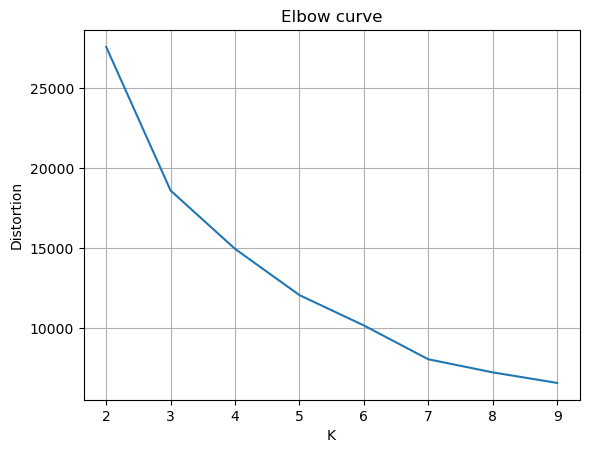

In [203]:

Distortion=[]
for k in range(2,10):
    KMeans_model = KMeans(n_clusters=k)
    KMeans_model.fit(X)
    Distortion.append(KMeans_model.inertia_)
plt.plot(range(2,10),Distortion)
plt.grid(True)
plt.xlabel("K")
plt.ylabel("Distortion")
plt.title("Elbow curve")
plt.show()

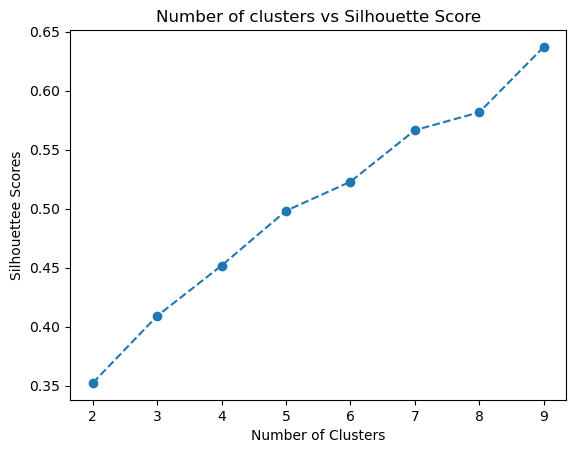

In [204]:
class_range = range(2,10)
silhouettescore = []
for n_clusters in class_range:
    silhouettescore.append(silhouette_score(X,KMeans(n_clusters=n_clusters,random_state=10).fit_predict(X)))
plt.plot(class_range,silhouettescore,marker='o',linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouettee Scores")
plt.title("Number of clusters vs Silhouette Score")
plt.show()

### Build the model using best value of K

In [205]:
KMeans_model9 = KMeans(n_clusters=9)
KMeans_model9.fit(X)

KMeans(n_clusters=9)

In [206]:
labels_9 = KMeans_model9.labels_
labels_9

array([6, 6, 6, ..., 8, 8, 8])

In [207]:
centroid_9 = KMeans_model9.cluster_centers_
centroid_9

array([[ 0.46926219,  0.28160468,  0.40668264,  0.35077734,  0.4194287 ,
         0.75029686,  0.02466505,  0.80757283],
       [-0.04768943,  0.8814577 ,  0.40668264,  0.52319989, -1.61300249,
        -0.73491008, -0.72059713, -1.27239384],
       [ 0.4583588 , -1.6802921 , -1.70069898,  1.51617751, -1.29033661,
        -0.5793987 , -0.25885552, -0.36791955],
       [ 0.4825459 ,  0.61186017,  0.40668264, -0.79069598,  0.63781556,
         1.39203631,  1.61528246,  0.66450421],
       [ 0.4825459 ,  0.71685103,  0.40668264, -0.70221815, -1.01041771,
        -0.88773167, -0.81112827,  0.5447733 ],
       [ 0.36928482, -1.38705866,  0.40668264,  1.12363724,  0.63781556,
        -0.03643552, -0.36727916,  0.33746404],
       [-1.90245848,  0.64595424, -0.11225722, -0.02412366,  0.62535609,
        -0.66028915, -0.74310043, -1.29161062],
       [-2.95877502,  0.69243455, -4.04843369,  0.42484763, -0.84784693,
        -0.08719612, -0.70614318, -2.46762419],
       [ 0.35786149, -0.5719723 

In [208]:
from sklearn.decomposition import PCA

In [209]:
pca = PCA(n_components=2)  # Reduce to 2 dimensions for plotting
X_pca = pca.fit_transform(X)

In [210]:
X_pca

array([[-0.90268856,  2.62553058],
       [-0.90268856,  2.62553058],
       [-0.90268856,  2.62553058],
       ...,
       [ 0.30612874,  0.20945251],
       [ 0.30612874,  0.20945251],
       [-0.0647028 , -1.12463845]])

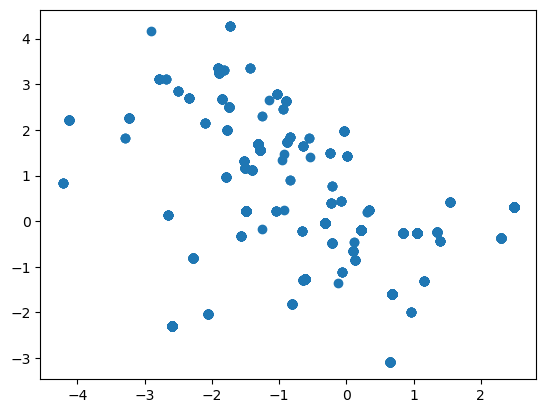

In [211]:
plt.scatter(X_pca[:,0],X_pca[:,1])

### Interpretation:
- The points are scattered across the plot, suggesting a somewhat random or dispersed distribution. They don't seem to form any immediately obvious clusters or patterns
- There's a slight concentration of points around the center of the plot (near 0,0), but it's not a strong or distinct cluster.

In [212]:
centroid_2d = pca.transform(centroid_9)
centroid_2d

array([[ 0.98540309, -0.34159331],
       [-1.55681816,  0.49605403],
       [-2.11907771, -2.1702848 ],
       [ 2.47567363,  0.2608622 ],
       [-0.19585627, -0.00762201],
       [-0.26863823, -1.27477662],
       [-1.45867642,  2.12251693],
       [-3.77093807,  2.11367547],
       [ 0.17072687, -0.22524012]])

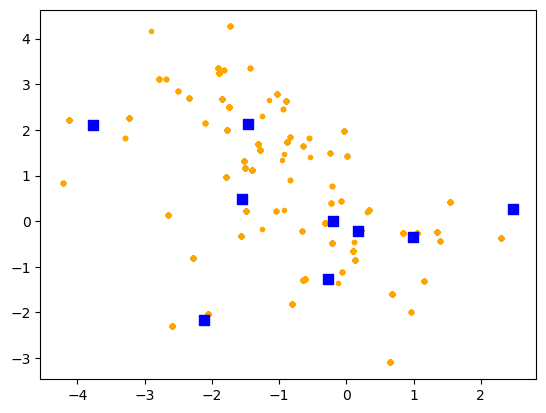

In [213]:
c=0
plt.scatter(X_pca[:,0],X_pca[:,1],marker='.',c='orange')

for i,j in centroid_2d:
    plt.scatter(i,j,s=50,c='blue',marker='s')
    c=c+1
plt.show()

### Interpretation:
- Orange points: These points appear to be more numerous and scattered across the plot. They likely represent cluster of data.
- Blue Squares: These points represent the center of the different category or cluster.

In [214]:
# Model Evaluation
CHI = calinski_harabasz_score(X,labels_9)
DBI = davies_bouldin_score(X,labels_9)
print("Silhouette Score :",silhouettescore[7])
print("Calinski Harabasz Score :",CHI)
print("Davies Bouldin Score :",DBI)

Silhouette Score : 0.6369957224601792
Calinski Harabasz Score : 2392.655937811564
Davies Bouldin Score : 0.7305555078300497


###  Interpretation
#### Silhouettescores : 0.6369
- This score indicates high cohesion and separation within the clusters.
- A value closer to 1 signifies that samples are well-clustered and clearly separated from other clusters.
- A score around 0.6 is generally considered excellent, suggesting that the clusters are well-defined and distinct.

#### Calinski Harabasz Score : 2635.13
- This score also suggests good cluster separation and high intra-cluster compactness.
- Higher values indicate better-defined clusters.
- A score of 2635.13 is quite high, suggesting that the clusters are well-separated and internally cohesive.
#### Davies Bouldin Score :0.6884
- This score measures the average similarity between each cluster and its most similar cluster.
- Lower values indicate better-defined clusters
- A score of 0.6884 is relatively low, suggesting that the clusters are well-separated and do not overlap significantly

#### overall Interpretation: This KMeans model with k=9 demonstrates a good performance in forming the distinct clusters.

### Focus Area 10 : Contract Management

In [215]:
Football_df['contract_expiration_date'].unique()

<DatetimeArray>
['2025-12-29 10:03:04.241000',        '2024-12-31 00:00:00',
        '2023-12-31 00:00:00',        '2025-06-30 00:00:00',
        '2024-06-30 00:00:00',        '2026-12-31 00:00:00',
        '2023-11-30 00:00:00',        '2025-12-31 00:00:00',
        '2027-06-30 00:00:00',        '2028-06-30 00:00:00',
        '2026-06-30 00:00:00']
Length: 11, dtype: datetime64[ns]

In [216]:
Football_df['contract_expiration_date'] = pd.to_datetime(Football_df['contract_expiration_date']) 
Football_df['time_to_expiration'] = (Football_df['contract_expiration_date'] - pd.to_datetime('today')).dt.days / 365


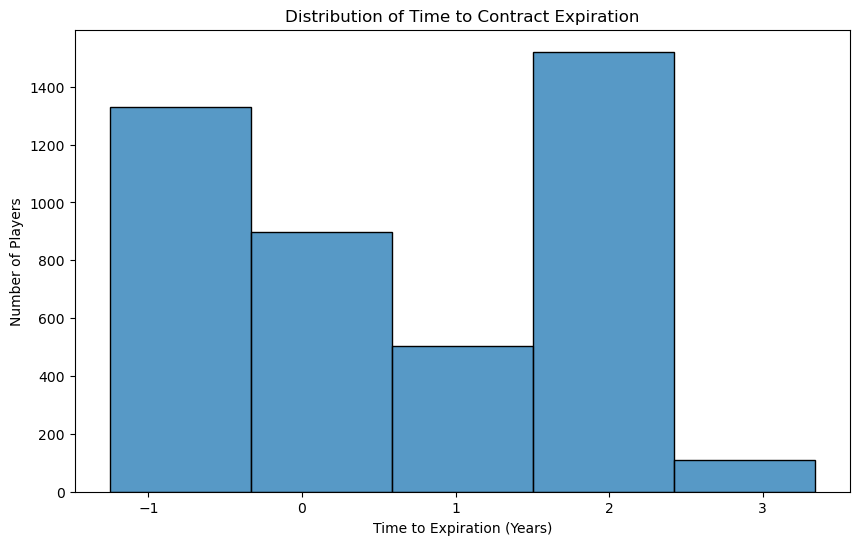

In [217]:
#Visualize the distribution of time to contract expiration
plt.figure(figsize=(10, 6))
sns.histplot(Football_df['time_to_expiration'], bins=5)
plt.title("Distribution of Time to Contract Expiration")
plt.xlabel("Time to Expiration (Years)")
plt.ylabel("Number of Players")
plt.show()

### Interpretation:
- The distribution of contract expiration for each players is calculated.
- The peak is in 2 years, shows that more number of players has there expiration in 2 years.